In [1]:
### Inclusions ###

rootf = ... ## Your folder where diffRBM_immunogenicity_TCRspecificity is saved ##

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# Plots stuff
import matplotlib as mpl
from matplotlib import patches
from pandas.plotting import table
mpl.rcParams['font.family'] = ['Garuda']
mpl.rcParams['font.serif'] = ['Garuda-Oblique']

import random
import sklearn
from sklearn import metrics

from matplotlib.patches import Patch

legend_for_comp = ['diffRBM', 'diffRBM (lin.)', 'PWM']
name_ratio = '(difference)'
name_eq9 = '(score diff.)'
name_generic_tcr = 'bulk'
col_top = 'DarkGoldenRod'
col_back = 'gray'
col_rand = 'MediumBlue'
col_enrich = 'CadetBlue'
color_freq = 'Tan'
alpha_col=0.4

list_pep=['GILGFVFTL','NLVPMVATV','GLCTLVAML','YLQPRTFLL']
list_pepV=['Influenza', 'CMV','EBV','Sars-Cov-2']
name_top = 'diffRBM units'
form_top= '$\mathcal{L}^{d}$'
adjective_top = 'Differential'
name_enrich = 'AA frequency ratio'
freq_text='Amino Acid (AA) frequency'
freq_text2 = 'Amino Acid frequency'
sle =' (to '
sri = ')'
name_diffrbm='full RBM'

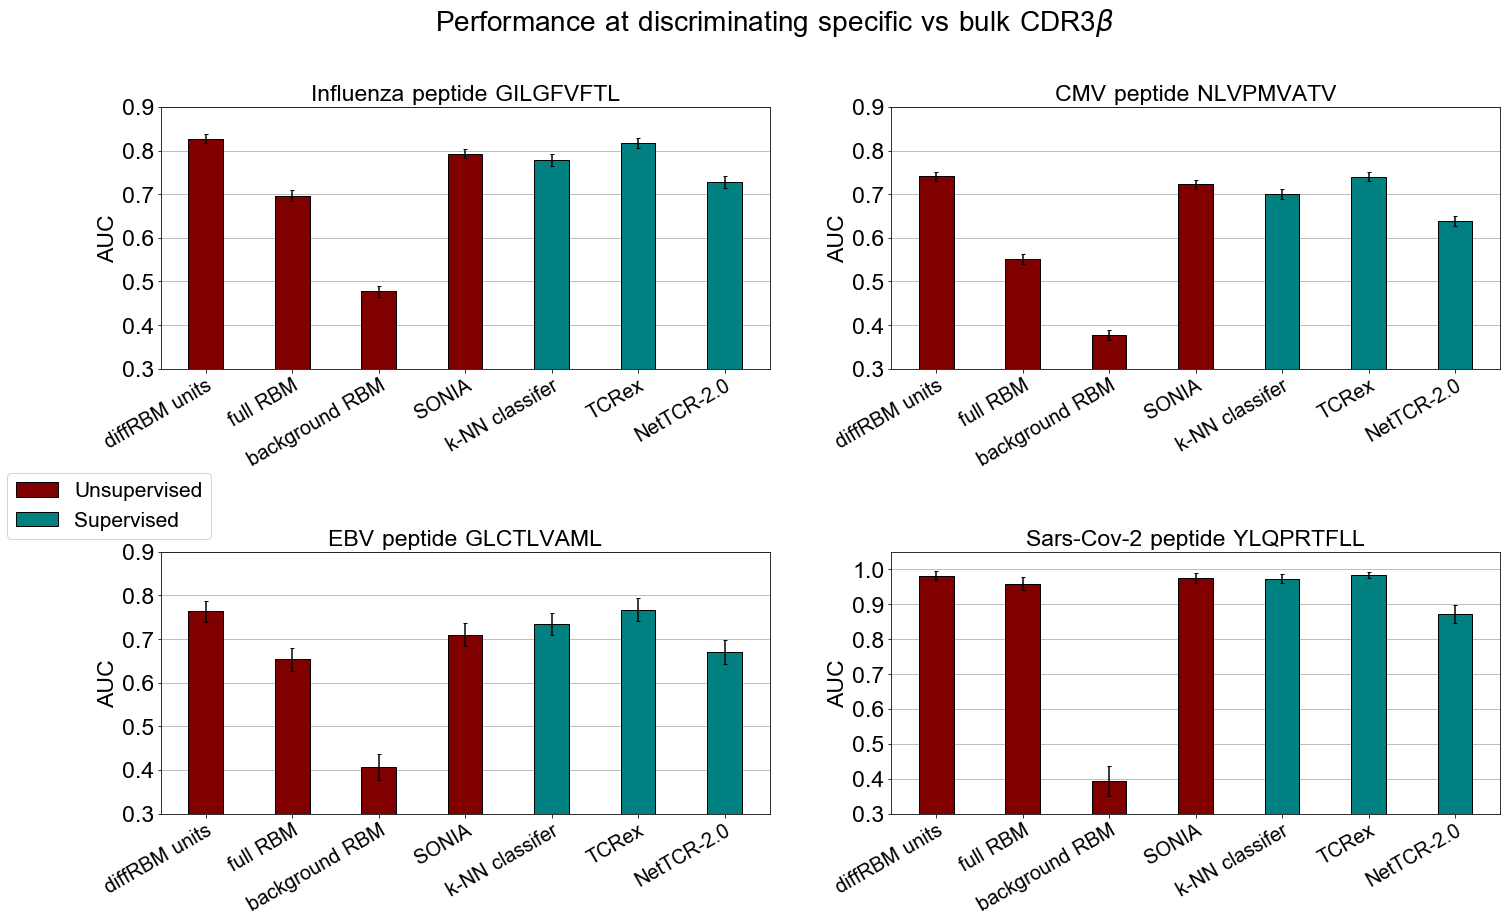

In [2]:
## Visualization ##
s2 = 23
sc = 2

add_vj = 'withVJ'

dataset_back='emerson_training_test'

if dataset_back == 'emerson_training_test':
    add_str=''
    fin_col = 'Maroon'
else:
    add_str='D'
    fin_col = 'IndianRed'

fig,axess=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(24)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.7)
plt.figtext(0.48, 0.97, 'Performance at discriminating specific vs ' +name_generic_tcr+r' CDR3$\beta$', ha='center', va='center', fontsize = s2+5)

lim_inf=0.3
mean_top=[]
means=[]
variances=[]
for p in range(4):
    
    if p==0:
        ax = axess[0,0]
    if p==1:
        ax = axess[0,1]
    if p==2:
        ax = axess[1,0]
    if p==3:
        ax = axess[1,1]
        
    ax.grid(axis='y', zorder=0)
    pep = list_pep[p]
    pepV = list_pepV[p]
    
    dataset = 'diffRBM_'+ pep ## This is the name of the folder with the model; if does not exist I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/' + dataset # Name folder reflects what immunog
    
    df = pd.read_csv(name_folder + '/' + add_str + 'final_aucs' + add_vj + '.tsv', sep = '\t')
    
    add_str=''
    list_sonia = list(np.loadtxt(name_folder + '/SONIA/' + add_str + 'AUROCs.txt'))
    list_knn = list(np.loadtxt(name_folder + '/kNN/' + add_str + 'AUROCs_kNN.txt'))
    
    ## Final predictions ##
    list_aucs_names1 = ['top RBM','diffRBM', 'RBMback']
    list_aucs_labels1 = [name_top, name_diffrbm,'background RBM']
    
    list_aucs1=[]
    for name in list_aucs_names1:
        list_aucs1.append(list(df[name].values))
        
    mean_top.append(np.mean(list_aucs1[0]))
    
    list_aucs_labels1.append('SONIA')
    list_aucs1.append(list_sonia)
    list_aucs_labels1.append('k-NN classifer')
    list_aucs1.append(list_knn)
    
    
    list_tcrex = list(np.loadtxt(name_folder + '/TCRex/AUROCs_'+pep+'_TCRex_test.txt'))
    list_aucs_labels1.append('TCRex')
    list_aucs1.append(list_tcrex)
    
    list_nettcr = list(np.loadtxt(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/NetTCR2/7peps_emerson_neg/' + pep + '-94.txt'))
    list_aucs_labels1.append('NetTCR-2.0')
    list_aucs1.append(list_nettcr)

    meth = list_aucs_labels1
    meth_val = [np.mean(ll) for ll in list_aucs1]
    error = [np.std(ll) for ll in list_aucs1]
    variances.append([np.var(ll) for ll in list_aucs1])
    means.append([np.mean(ll) for ll in list_aucs1])

    x_pos = np.arange(0,2*len(meth_val),2)
    
    colors3 = list(np.repeat([fin_col],len(meth)-3)) + ['Teal', 'Teal', 'Teal']

    bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3, zorder=3)

    ax.set_xticks(x_pos)
    ax.set_ylabel('AUC', fontsize = s2)
   
    ax.tick_params(axis='y', which='major', labelsize = s2)
    ax.set_xticklabels(meth, rotation = 30, fontsize  = s2-3, ha='right', rotation_mode = 'anchor')
    if p==0:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    else:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    
    ax.set_yticks([0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_ylim([lim_inf,0.9]);
    if p==3:
        ax.set_ylim([lim_inf,1.05]);
    
    if p==1:
        list_negs_names= ['Unsupervised', 'Supervised']
        custom_lines =[Patch(facecolor=i, edgecolor='k') for i in [fin_col,'Teal']]                                                   
        lgd = ax.legend(custom_lines, list_negs_names,loc='best', bbox_to_anchor=(-1.1, -0.36), fontsize=s2-2)

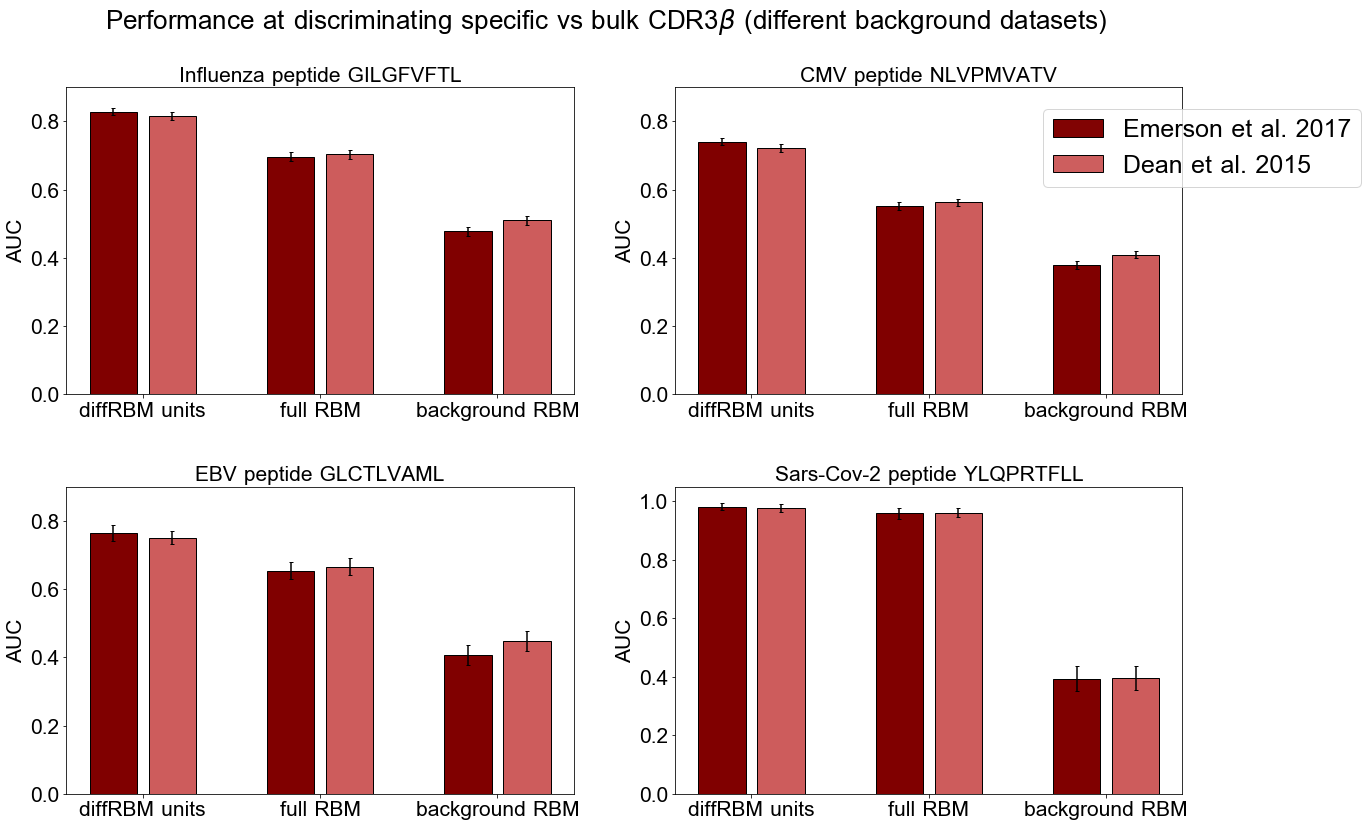

In [3]:
## With Dean et al. 2015 data ##

add_vj = 'withVJ'

NT=1.01
s2 = 21
sc = 2
c1='Maroon'
c2='IndianRed'

fig,axess=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(20)
plt.figtext(0.5, 0.95, 'Performance at discriminating specific vs '+name_generic_tcr+r' CDR3$\beta$ (different background datasets)', ha='center', va='center', fontsize = s2+5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
em_top=[]
dean_top=[]
for p in range(4):
    if p==0:
        ax = axess[0,0]
    if p==1:
        ax = axess[0,1]
    if p==2:
        ax = axess[1,0]
    if p==3:
        ax = axess[1,1]
        
    pep = list_pep[p]
    pepV = list_pepV[p]
    dataset = 'diffRBM_'+ pep ## This is the name of the folder with the model; if does not exist I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/' + dataset # Name folder reflects what immunog
    
    list_aucs_names1 = ['top RBM', 'diffRBM','RBMback']
    list_aucs_labels1 = [name_top, name_diffrbm,'background RBM']
    
    dataset_back='emerson_training_test'
    if dataset_back == 'emerson_training_test':
        add_str= ''
        fin_col = c1 
    else:
        add_str= 'D'
        fin_col = c2 
    
    df = pd.read_csv(name_folder + '/' + add_str + 'final_aucs' + add_vj + '.tsv', sep='\t')
    list_aucs1=[]
    for name in list_aucs_names1:
        list_aucs1.append(list(df[name].values))

    em_top.append(list_aucs1[0])
    
    meth = list_aucs_names1
    meth_val = [np.mean(ll) for ll in list_aucs1]
    error = [np.std(ll) for ll in list_aucs1]
    x_pos = np.array([0, 3, 6])
    bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = fin_col)
    
    ax.set_xticks([0.5,3.5,6.5])
    ax.set_ylabel('AUC', fontsize = s2)

    ax.tick_params(axis='y', which='major', labelsize = s2)
    ax.set_xticklabels(list_aucs_labels1, rotation = 0, fontsize  = s2, ha='center', rotation_mode = 'anchor')
    ax.set_ylim([0,NT]);
    if p==0:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    else:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
        
    st=s2+4
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    custom_lines =[Patch(facecolor=c1, edgecolor='k', alpha = 0.99),Patch(facecolor=c2, edgecolor='k', alpha = 0.99)]                                                          
    
    if p == 1:
        lgd = ax.legend(custom_lines, ['Emerson et al. 2017', 'Dean et al. 2015'], loc='best', bbox_to_anchor=(0.7, 0.97) , fontsize=st)
    
    dataset_back = 'dean_training_test'
    if dataset_back == 'emerson_training_test':
        add_str=''
        fin_col = c1 
    else:
        add_str='D'
        fin_col = c2 
        
    df = pd.read_csv(name_folder + '/'+add_str+'final_aucs'+add_vj+'.tsv', sep = '\t')
    
    list_aucs1=[]
    for name in list_aucs_names1:
        list_aucs1.append(list(df[name].values))
    
    dean_top.append(list_aucs1[0])
   
    meth = list_aucs_names1
    meth_val = [np.mean(ll) for ll in list_aucs1]
    error = [np.std(ll) for ll in list_aucs1]
    x_pos = np.array([1, 4, 7])
    bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = fin_col)
      
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_ylim([0,0.9]);
    if p==3:
        ax.set_ylim([0,1.05]);

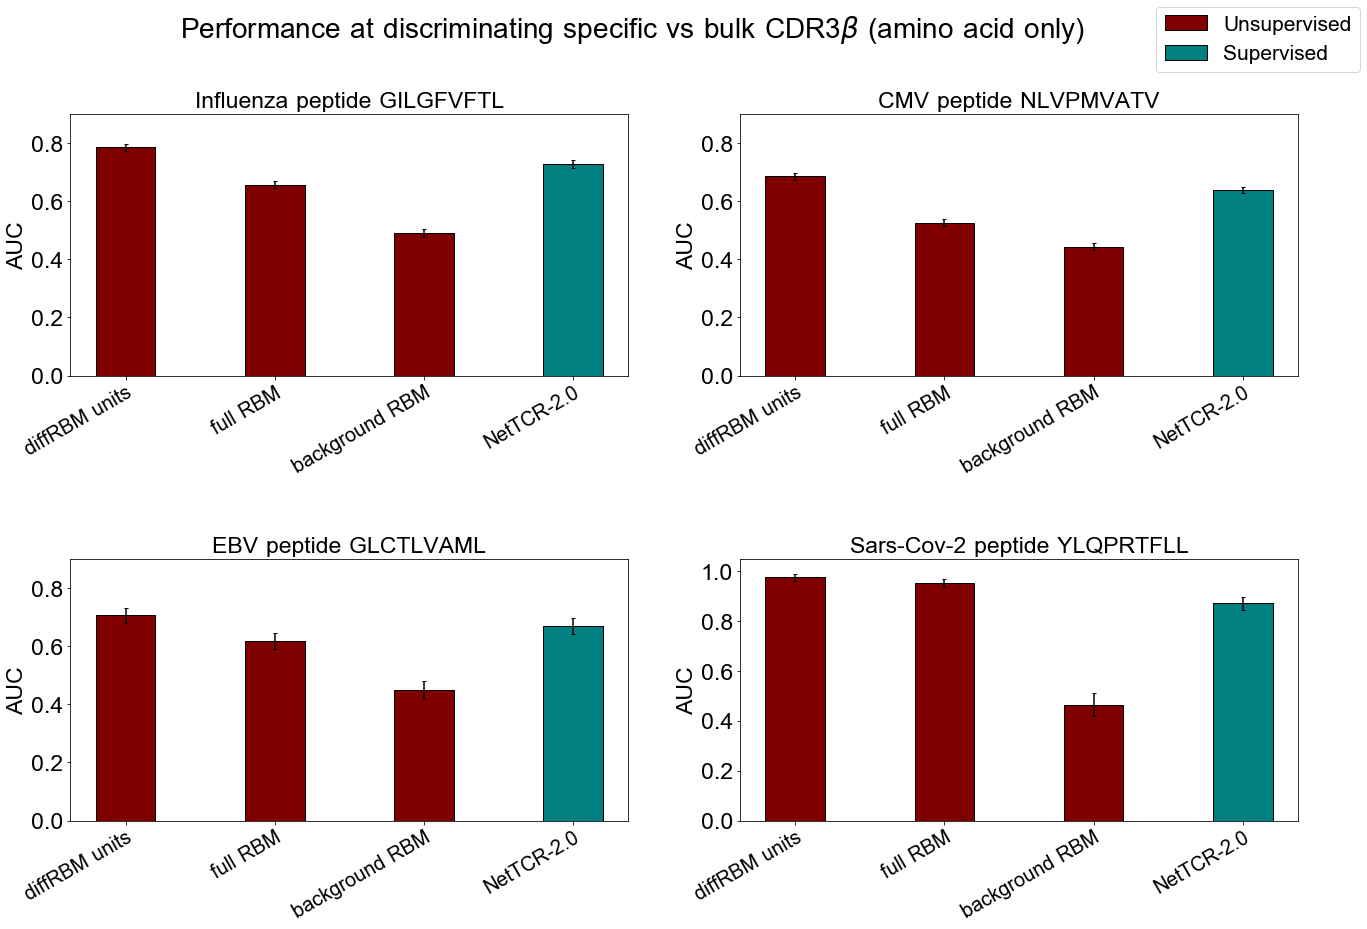

In [4]:
## Without V and J ##
s2 = 23

dataset_back='emerson_training_test'
if dataset_back == 'emerson_training_test':
    add_str=''
    fin_col = 'Maroon'
else:
    add_str='D'
    fin_col = 'IndianRed'
    
add_vj = 'withoutVJ'

fig,axess=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(22)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.7)
plt.figtext(0.48, 0.97, 'Performance at discriminating specific vs '+name_generic_tcr+r' CDR3$\beta$ (amino acid only)', ha='center', va='center', fontsize = s2+5)

mean_top=[]
variances=[]
means=[]
for p in range(4):
    
    if p==0:
        ax = axess[0,0]
    if p==1:
        ax = axess[0,1]
    if p==2:
        ax = axess[1,0]
    if p==3:
        ax = axess[1,1]
        
    pep = list_pep[p]
    pepV = list_pepV[p]
    dataset = 'diffRBM_'+ pep ## This is the name of the folder with the model; if does not exist I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/' + dataset # Name folder reflects what immunog
    df = pd.read_csv(name_folder + '/' + add_str + 'final_aucs' + add_vj + '.tsv', sep = '\t')
   
    list_nettcr = list(np.loadtxt(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/NetTCR2/7peps_emerson_neg/' + pep + '-94.txt'))
    ## Final predictions ##
    
    list_aucs_names1 = ['top RBM', 'diffRBM', 'RBMback']
    list_aucs_labels1 = [name_top, name_diffrbm, 'background RBM']
    
    list_aucs1=[]
    for name in list_aucs_names1:
        list_aucs1.append(list(df[name].values))
    
    mean_top.append(np.mean(list_aucs1[0]))
    list_aucs_labels1.append('NetTCR-2.0')
    list_aucs1.append(list_nettcr)

    meth = list_aucs_labels1
    meth_val = [np.mean(ll) for ll in list_aucs1]
    meth_vals = [np.std(ll) for ll in list_aucs1]
    variances.append([np.var(ll) for ll in list_aucs1])
    means.append([np.mean(ll) for ll in list_aucs1])
    error = [np.std(ll) for ll in list_aucs1]

    x_pos = np.arange(0,2*len(meth_val),2)
    colors3 = list(np.repeat([fin_col],len(meth)-1)) + ['Teal']
    sc = 2

    bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)

    ax.set_xticks(x_pos)
    ax.set_ylabel('AUC', fontsize = s2)
    ax.tick_params(axis='y', which='major', labelsize = s2)
    ax.set_xticklabels(meth, rotation = 30, fontsize  = s2-3, ha='right', rotation_mode = 'anchor')
    if p==0:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    else:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_ylim([0,0.9]);
    if p==3:
        ax.set_ylim([0,1.05]);
    
    if p==1:
        list_negs_names= ['Unsupervised', 'Supervised']
        custom_lines =[Patch(facecolor=i, edgecolor='k') for i in [fin_col,'Teal']]                                                   
        lgd = ax.legend(custom_lines, list_negs_names,loc='best', bbox_to_anchor=(1.13, 1.45), fontsize=s2-2)

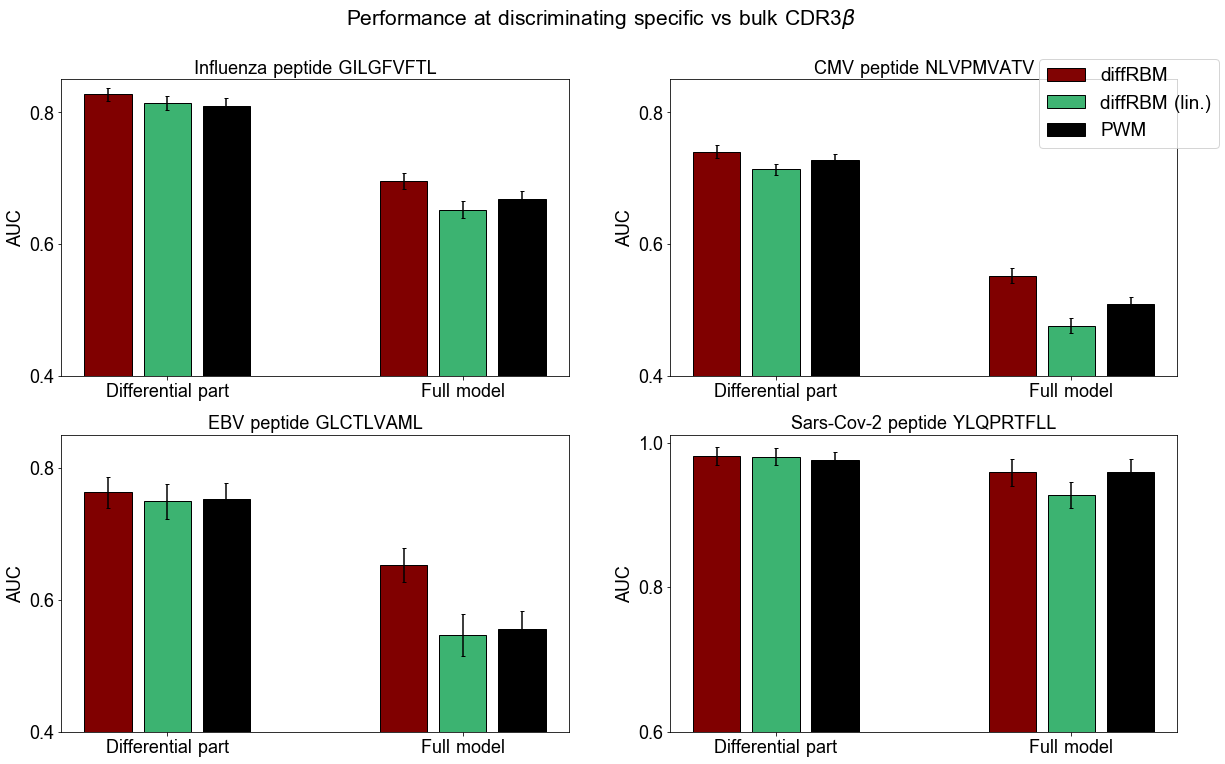

In [5]:
## Comparison with linear models ##

add_vj = 'withVJ'
c1='Maroon'
c2='MediumSeaGreen'
c3='Black'
NT=1.01
colors3 = [c1, c2, c3, c1,c2,c3]
s2 = 18
sc = 2

fig,axess=plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(20)
plt.figtext(0.5, 0.95, 'Performance at discriminating specific vs '+name_generic_tcr+r' CDR3$\beta$', ha='center', va='center', fontsize = s2+3)

for p in range(4):
    
    if p==0:
        ax = axess[0,0]
    if p==1:
        ax = axess[0,1]
    if p==2:
        ax = axess[1,0]
    if p==3:
        ax = axess[1,1]
        
    pep = list_pep[p]
    pepV = list_pepV[p]
    dataset = 'diffRBM_'+ pep ## This is the name of the folder with the model; if does not exist I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/' + dataset # Name folder reflects what immunog
    df = pd.read_csv(name_folder + '/final_aucs'+add_vj+'.tsv', sep = '\t')
    list_sonia = list(np.loadtxt(name_folder + '/SONIA/AUROCs.txt'))

    ## Final predictions ##

    list_aucs_names1 = ['top RBM', 'top RBM (lin)','top PWM', 'diffRBM', 'diffRBM (lin)','diffPWM']
    
    list_aucs1=[]
    for name in list_aucs_names1:
        list_aucs1.append(list(df[name].values))

    meth = list_aucs_names1
    meth_val = [np.mean(ll) for ll in list_aucs1]
    error = [np.std(ll) for ll in list_aucs1]
    x_pos = np.array([0,1,2, 5, 6, 7])
    bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)
    ax.set_xticks([1,6])
    ax.set_ylabel('AUC', fontsize = s2)
    ax.tick_params(axis='y', which='major', labelsize = s2)
    ax.set_xticklabels([adjective_top + ' part','Full model'], rotation = 0, fontsize  = s2, ha='center', rotation_mode = 'anchor')
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_ylim([0.4,0.85]);
    
    if p==3:
        ax.set_ylim([0.6,NT]);
    if p==0:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
    else:
        ax.set_title(pepV + ' peptide ' + pep, fontsize = s2)
        
    st=s2+1
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    custom_lines =[Patch(facecolor=c1, edgecolor='k', alpha = 0.99),Patch(facecolor=c2, edgecolor='k', alpha = 0.99),Patch(facecolor=c3, edgecolor='k', alpha = 0.99)]                                                          
    
    if p == 1:
        lgd = ax.legend(custom_lines, legend_for_comp, loc='best', bbox_to_anchor=(1.1, 1.1) , fontsize=st)

AUCs for peptides

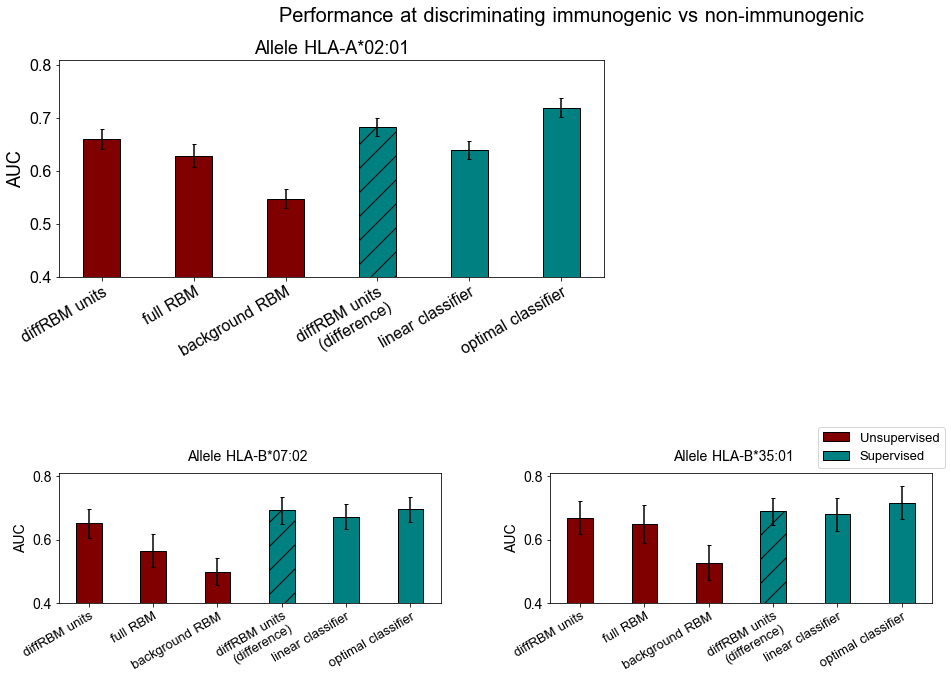

In [6]:
s2 = 17
sc = 2 
NT=0.81
rf='_nfb'
rf=''
n_sup=3
hatches = ['','','','/','','']
means=[]
variances=[]
fig,axx=plt.subplots(1,2, gridspec_kw={'width_ratios': [3,1]})
fig.set_figheight(4)
fig.set_figwidth(15)
plt.subplots_adjust(wspace = 0.3, hspace = 1)

list_aucs_names1 = ['top RBM','diffRBM','RBMback','difference of top RBM','Linear classifier', 'Deep classifier']
list_aucs_labels1 = [name_top, name_diffrbm,'background RBM', name_top + '\n' + name_ratio,'linear classifier', 'optimal classifier']
list_aucs_names2 = ['diffRBM', 'RBMback','top RBM']
list_aucs_labels2 = [name_diffrbm, 'background RBM','top RBM']
list_aucs_names2 = [n + '_R' for n in list_aucs_names2]

HLA = 'HLA-A*02:01'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
    
list_aucs2=[]
for name in list_aucs_names2:
    list_aucs2.append(list(df[name].values))
    
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))   

plt.figtext(0.6, 1.03, 'Performance at discriminating immunogenic vs non-immunogenic', ha='center', va='center', fontsize = s2+3)
y = list_aucs_names1.index('RBMback')

list1h = list_aucs1[0]
axf=axx[0]
ax=axf
meth = list_aucs_labels1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]
variances.append([np.var(ll) for ll in list_aucs1])
means.append([np.mean(ll) for ll in list_aucs1])

x_pos = np.arange(0,2*len(meth_val),2)
colors3 = list(np.repeat(['Maroon'],len(meth)-n_sup)) + list(np.repeat(['Teal'],n_sup))
bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3, hatch=hatches)
ax.set_xticks(x_pos)
ax.set_ylabel('AUC', fontsize = s2+1)
ax.tick_params(axis='y', which='major', labelsize = s2-1)
ax.set_xticklabels(meth, rotation = 30, fontsize  = s2-1, ha='right', rotation_mode = 'anchor')
ax.set_title('Allele ' + HLA, fontsize = s2+1)
ax.set_ylim([0.4,NT]);

ax=axx[1]
ax.axis('off')

s2 = 13
sc = 2

HLA = 'HLA-A*02:01'
HLA = 'HLA-B*07:02'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
    
list_aucs2=[]
for name in list_aucs_names2:
    list_aucs2.append(list(df[name].values))
    
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))
plt.figtext(0.3, -0.5, 'Allele ' + HLA, ha='center', va='center', fontsize = s2+1)

y = list_aucs_names1.index('RBMback')
axin1 = axf.inset_axes([0, -1.5, 0.7, 0.6]) 
ax = axin1

meth = list_aucs_labels1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]

variances.append([np.var(ll) for ll in list_aucs1])
means.append([np.mean(ll) for ll in list_aucs1])

x_pos = np.arange(0,2*len(meth_val),2)
colors3 = list(np.repeat(['Maroon'],len(meth)-n_sup)) + list(np.repeat(['Teal'],n_sup))
bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3, hatch=hatches)
ax.set_xticks(x_pos)
ax.set_ylabel('AUC', fontsize = s2+1)
ax.tick_params(axis='y', which='major', labelsize = s2+1)
ax.set_xticklabels(meth, rotation = 30, fontsize  = s2, ha='right', rotation_mode = 'anchor')
ax.set_ylim([0.4,NT]);

HLA = 'HLA-A*02:01'
HLA = 'HLA-B*07:02'
HLA = 'HLA-B*35:01'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
    
list_aucs2=[]
for name in list_aucs_names2:
    list_aucs2.append(list(df[name].values))
    
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))
plt.figtext(0.75, -0.5, 'Allele ' + HLA, ha='center', va='center', fontsize = s2+1)

y = list_aucs_names1.index('RBMback')

axin1 = axf.inset_axes([0.9, -1.5, 0.7, 0.6]) 
ax = axin1

meth = list_aucs_labels1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]
variances.append([np.var(ll) for ll in list_aucs1])
means.append([np.mean(ll) for ll in list_aucs1])


x_pos = np.arange(0,2*len(meth_val),2)
colors3 = list(np.repeat(['Maroon'],len(meth)-n_sup)) + list(np.repeat(['Teal'],n_sup))
bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3, hatch=hatches)
ax.set_xticks(x_pos)
ax.set_ylabel('AUC', fontsize = s2+1)
ax.tick_params(axis='y', which='major', labelsize = s2+1)
ax.set_xticklabels(meth, rotation = 30, fontsize  = s2, ha='right', rotation_mode = 'anchor')
ax.set_ylim([0.4,NT]);

fin_col = 'Maroon'
list_negs_names= ['Unsupervised', 'Supervised']
custom_lines =[Patch(facecolor=i, edgecolor='k') for i in [fin_col,'Teal']]                                                   
lgd = ax.legend(custom_lines, list_negs_names,loc='best', bbox_to_anchor=(1.05, 1.4), fontsize=s2)

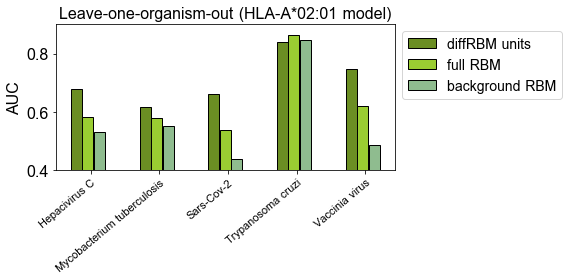

In [7]:
import matplotlib as mpl
from matplotlib import patches
from matplotlib.patches import Patch
s2=16

HLA = 'HLA-A*02:01'
name_mf='/models_9.5'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset

## Leave-one-species-out validation ##

## here both immunogenic and non-immunogenic come from same species
df = pd.read_csv(name_folder + name_mf + '/final_aucs' + str(np.mean(range_len)) + '_validation_speciesN.tsv', sep = '\t')

list_aucs_names1 = ['top RBM','diffRBM','RBMback']

list_aucs=[]
for name in list_aucs_names1:
    list_aucs.append(list(df[name].values))
list_aucs_labels=[name_top,name_diffrbm,'background RBM']

df = pd.read_csv(name_folder + name_mf + '/final_aucs' + str(np.mean(range_len)) + '_validation_speciesN_meta.tsv', sep = '\t')
list_species = list(df['list_species'].values)
list_ind_sp = list(df['list_ind_sp'].values)
list_ind_spN = list(df['list_ind_spN'].values)

lim=15
inds = [i for i in range(len(list_ind_sp)) if list_ind_spN[i] >= lim and list_ind_sp[i] >= lim]

lik_sp=[]
lik_spN=[]
for species in range(18):
    lik_sp.append(np.loadtxt(name_folder + name_mf + '/lik_sp_' + str(species) + '_validation_speciesN.txt'))
    lik_spN.append(np.loadtxt(name_folder + name_mf + '/lik_spN_' + str(species) + '_validation_speciesN.txt'))

colors = ['OliveDrab', 'YellowGreen' ,'DarkSeaGreen']

meth_species0 = [list_species[t] for t in inds]
meth_species = []
for m in meth_species0:
    if m != 'Severe acute respiratory syndrome coronavirus 2':
        meth_species.append(m)
    else:
        meth_species.append('Sars-Cov-2')

meth_val=[]
for i in inds:
    meth_val.append(list_aucs[0][i])
    meth_val.append(list_aucs[1][i])
    meth_val.append(list_aucs[2][i])

meth=list(np.arange(len(meth_val)))

fig,ax=plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

dt=0.5
x_pos=[]
x_ticks=[]
init=0
for p in range(len(meth_species)):
    x_pos = x_pos + list(np.arange(init,init+dt*len(list_aucs),dt))
    x_ticks.append(init+dt*1.25)
    init = init+dt*len(list_aucs) + 1.5

bars = ax.bar(x_pos, meth_val, width=0.48, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors)

custom_lines =[Patch(facecolor=colors[i], edgecolor='k') for i in range(len(colors))]                                                   
lgd = ax.legend(custom_lines, list_aucs_labels,loc='best', bbox_to_anchor=(1, 1), fontsize=14)

ax.set_xticks(x_ticks)
ax.set_ylabel('AUC', fontsize = s2)
ax.tick_params(axis='y', which='major', labelsize = s2)
ax.set_xticklabels(meth_species, rotation = 40, fontsize  = s2-5, ha='right', rotation_mode = 'anchor')
ax.set_title('Leave-one-organism-out (HLA-A*02:01 model)', fontsize = s2)

ax.set_ylim([0.4,0.9]);
fig.tight_layout()

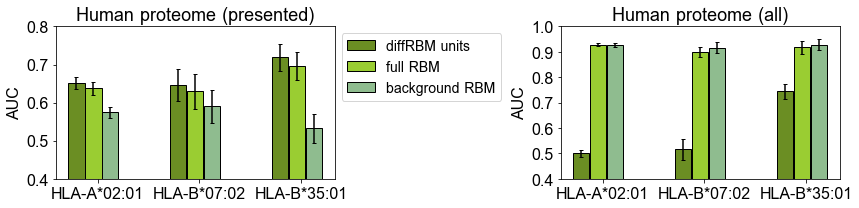

In [8]:
import matplotlib as mpl
from matplotlib import patches
from matplotlib.patches import Patch

list_hlas=['HLA-A*02:01','HLA-B*07:02','HLA-B*35:01']
list_aucs_labels=[name_top,name_diffrbm,'background RBM']
colors = ['OliveDrab', 'YellowGreen' ,'DarkSeaGreen']


fig,axess=plt.subplots(1,2)
fig.set_figheight(3)
fig.set_figwidth(12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

ax=axess[0]
list_aucs_names1 = ['top RBM_HPP','diffRBM_HPP','backRBM_HPP']
list_aucs=[]
meth_val=[]
error=[]

for HLA in list_hlas:
    range_len = [8,9,10,11]
    dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
    df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')

    for name in list_aucs_names1:
        meth_val.append(np.mean(df[name].values))
        error.append(np.std(df[name].values))
list_aucs=meth_val

meth=list(np.arange(len(meth_val)))
meth_hla=list_hlas

dt=0.5
x_pos=[]
x_ticks=[]
init=0
for p in range(len(meth_hla)):
    x_pos = x_pos + list(np.arange(init,init+dt*len(meth_hla),dt))
    x_ticks.append(init+dt*1.25)
    init = init+dt*len(meth_hla) + 1.5

bars = ax.bar(x_pos, meth_val, yerr=error, width=0.48, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors)
custom_lines =[Patch(facecolor=colors[i], edgecolor='k') for i in range(len(colors))]                                                   
lgd = ax.legend(custom_lines, list_aucs_labels,loc='best', bbox_to_anchor=(1, 1), fontsize=14)

ax.set_xticks(x_ticks)
ax.set_ylabel('AUC', fontsize = s2)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.tick_params(axis='y', which='major', labelsize = s2)
ax.set_xticklabels(meth_hla, rotation = 0, fontsize  = s2, ha='center', rotation_mode = 'anchor')
ax.set_title('Human proteome (presented)', fontsize = s2+2)

ax.set_ylim([0.4,0.8]);

list_aucs_names1 = ['top RBM_R','diffRBM_R','RBMback_R']
list_aucs=[]
meth_val=[]
error=[]

for HLA in list_hlas:
    range_len = [8,9,10,11]
    dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
    df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')

    for name in list_aucs_names1:
        meth_val.append(np.mean(df[name].values))
        error.append(np.std(df[name].values))

list_aucs = meth_val

meth=list(np.arange(len(meth_val)))
meth_hla=list_hlas


ax=axess[1]
dt=0.5
x_pos=[]
x_ticks=[]
init=0
for p in range(len(meth_hla)):
    x_pos = x_pos + list(np.arange(init,init+dt*len(meth_hla),dt))
    x_ticks.append(init+dt*1.25)
    init = init+dt*len(meth_hla) + 1.5

bars = ax.bar(x_pos, meth_val, yerr=error, width=0.48, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors)

ax.set_xticks(x_ticks)
ax.set_ylabel('AUC', fontsize = s2)
#ax.set_xlabel('Techniques', fontsize = s2)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.tick_params(axis='y', which='major', labelsize = s2)
ax.set_xticklabels(meth_hla, rotation = 0, fontsize  = s2, ha='center', rotation_mode = 'anchor')
ax.set_title('Human proteome (all)', fontsize = s2+2)
ax.set_ylim([0.4,1]);
fig.tight_layout()

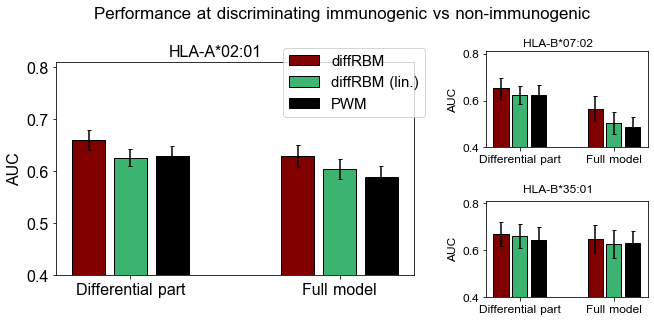

In [9]:
c1='Maroon'
c2='MediumSeaGreen'
c3='Black'
NT=0.81
label_top=adjective_top + ' part'
colors3 = [c1, c2, c3, c1,c2,c3]
s2 = 16
sc = 2

fig,ax=plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(12)
plt.figtext(0.4, 1.08, 'Performance at discriminating immunogenic vs non-immunogenic', ha='center', va='center', fontsize = s2+1)

HLA = 'HLA-A*02:01'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
list_aucs_names1 = ['top RBM', 'top RBM (lin)','top PWM', 'diffRBM', 'diffRBM (lin)','diffPWM']
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))
meth = list_aucs_names1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]
x_pos = np.array([0,  1,  2, 5, 6, 7])
bars = ax.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)
ax.set_xticks([1,6])
ax.set_ylabel('AUC', fontsize = s2)
ax.tick_params(axis='y', which='major', labelsize = s2)
ax.set_xticklabels([label_top,'Full model'], rotation = 0, fontsize  = s2, ha='center', rotation_mode = 'anchor')
ax.set_ylim([0.4,NT]);
plt.figtext(0.2, 0.95, HLA, ha='left', va='center', fontsize = s2)

st=s2-1
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
custom_lines =[Patch(facecolor=c1, edgecolor='k', alpha = 0.99),Patch(facecolor=c2, edgecolor='k', alpha = 0.99),Patch(facecolor=c3, edgecolor='k', alpha = 0.99)]                                                          
lgd = ax.legend(custom_lines, legend_for_comp, loc='best', bbox_to_anchor=(1.05, 1.1) , fontsize=st)


n=4
axin1 = ax.inset_axes([1.2, 0.6, 0.45, 0.45]) 
ax1 = axin1
HLA = 'HLA-A*02:01'
HLA = 'HLA-B*07:02'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
list_aucs_names1 = ['top RBM', 'top RBM (lin)','top PWM', 'diffRBM', 'diffRBM (lin)','diffPWM']
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))
meth = list_aucs_names1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]
x_pos = np.array([0,  1,  2, 5, 6, 7])
bars = ax1.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)
ax1.set_xticks([1,6])
ax1.set_ylabel('AUC', fontsize = s2-n)
ax1.tick_params(axis='y', which='major', labelsize = s2-n)
ax1.set_xticklabels([label_top,'Full model'], rotation = 0, fontsize  = s2-n, ha='center', rotation_mode = 'anchor')
ax1.set_ylim([0.4,NT]);
plt.figtext(0.61, 0.98, HLA, ha='left', va='center', fontsize = s2-n)

axin1 = ax.inset_axes([1.2,-0.1, 0.45, 0.45]) 
ax2 = axin1
HLA = 'HLA-A*02:01'
HLA = 'HLA-B*07:02'
HLA = 'HLA-B*35:01'
range_len = [8,9,10,11]
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
df = pd.read_csv(name_folder + '/Final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
list_aucs_names1 = ['top RBM', 'top RBM (lin)','top PWM', 'diffRBM', 'diffRBM (lin)','diffPWM']
list_aucs1=[]
for name in list_aucs_names1:
    list_aucs1.append(list(df[name].values))
meth = list_aucs_names1
meth_val = [np.mean(ll) for ll in list_aucs1]
error = [np.std(ll) for ll in list_aucs1]
x_pos = np.array([0,  1,  2, 5, 6, 7])
bars = ax2.bar(x_pos, meth_val, yerr=error, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)
ax2.set_xticks([1,6])
ax2.set_ylabel('AUC', fontsize = s2-n)
ax2.tick_params(axis='y', which='major', labelsize = s2-n)
ax2.set_xticklabels([label_top,'Full model'], rotation = 0, fontsize  = s2-n, ha='center', rotation_mode = 'anchor')
ax2.set_ylim([0.4,NT]);
plt.figtext(0.61, 0.47, HLA, ha='left', va='center', fontsize = s2-n)
fig.tight_layout()

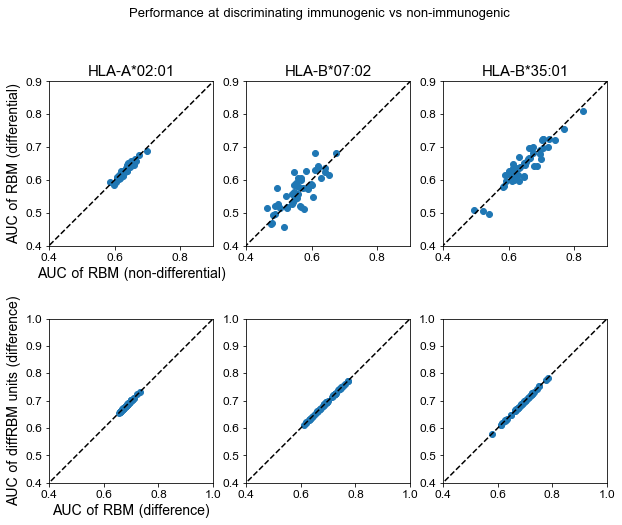

In [10]:
list_hlas = ['HLA-A*02:01', 'HLA-B*07:02', 'HLA-B*35:01']
range_len = [8,9,10,11]

s2=12
fig, axes =plt.subplots(2,len(list_hlas))
fig.set_figheight(8)
fig.set_figwidth(10)
plt.suptitle('Performance at discriminating immunogenic vs non-immunogenic', fontsize = s2+1)

for h in range(len(list_hlas)):
    
    HLA = list_hlas[h]
    
    dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
    df = pd.read_csv(name_folder + '/models_9.5/final_aucs' + str(np.mean(range_len)) + '.tsv', sep = '\t')
    
    ax = axes[0,h]
    ax.set_title(list_hlas[h],fontsize=s2+3)
    
    ax.scatter(df['Normal RBM'].values, df['diffRBM'].values)
    ax.set_aspect('equal')
    if h ==0:
        ax.set_ylabel('AUC of RBM (differential)',fontsize=14)
        ax.set_xlabel('AUC of RBM (non-differential)',fontsize=s2+2)
        
    ax.tick_params(axis='both', which='major', labelsize = s2)
    ax.plot([0, 1], [0, 1], '--', c= 'k')
    ax.set_ylim([0.4,0.9])
    ax.set_xlim([0.4,0.9])
    
    
    ax = axes[1,h]
    
    ax.scatter(df['difference of diffRBM'].values,df['difference of top RBM'].values)
    ax.set_aspect('equal')
    if h ==0:
        ax.set_xlabel('AUC of RBM ' + name_ratio,fontsize=14)
        ax.set_ylabel('AUC of ' + name_top + ' ' + name_ratio,fontsize=s2+2)
        
    ax.tick_params(axis='both', which='major', labelsize = s2)
    ax.plot([0, 1], [0, 1], '--', c= 'k')
    
    ax.set_ylim([0.4,1])
    ax.set_xlim([0.4,1])

Contact prediction for TCRs

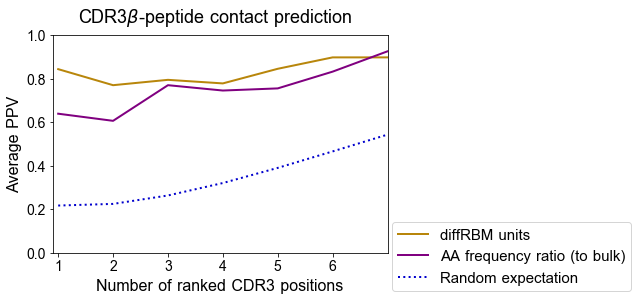

In [11]:
columns = ['Random','Frequency', 'diffPWM', 'topRBM (lin)', 'topRBM2', 'topRBM1']
columns_name = ['Random expectation',freq_text, name_enrich + sle + 'bulk'+ sri, name_top + ' (lin.)', name_top + ' ' + name_eq9, name_top]
styles = [':', '-', '-', '-.', '--','-']
colors = [col_rand,'k','Purple',col_top,col_top,col_top]

dict_names ={columns[i]:columns_name[i] for i in range(len(columns))}
dict_styles ={columns[i]:styles[i] for i in range(len(columns))}
dict_colors ={columns[i]:colors[i] for i in range(len(columns))}

pepN = 'All'
di = 4
sl=2
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')
columns = ['Random', 'diffPWM', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

s2=16
fig,ax=plt.subplots()
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    plt.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

plt.xlabel('Number of ranked CDR3 positions', fontsize=s2)
plt.ylabel('Average PPV', fontsize=s2)
plt.suptitle(r'CDR3$\beta$-peptide contact prediction', fontsize=s2+2)
ax.legend(fontsize=s2-1,bbox_to_anchor=(0.99, -0.21), loc='lower left')
sa=6
plt.xlim([-0.1,sa])
plt.ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

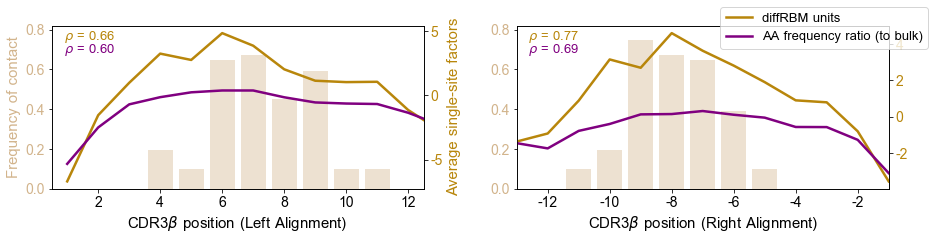

In [12]:
s2 = 16
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/frequency_contacts_ang' + str(di) + '_rew' + str(th) + '.tsv', sep='\t')
sym = df['sym'].values
freqs = df['freqs'].values
pred_diffpwm1 = df['pred_diffpwm'].values
pred_rbm = df['pred_rbm'].values

fig,axess=plt.subplots(1,2)
fig.set_figheight(3)
fig.set_figwidth(15)
plt.subplots_adjust(wspace = 0.25)

ax1 = axess[0]
color=color_freq
ax1.bar(sym,freqs, color=color, alpha=alpha_col)
ax1.set_xlabel(r'CDR3$\beta$ position (Left Alignment)',fontsize=s2-1)
ax1.set_ylabel('Frequency of contact',fontsize=s2-1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2= ax1.twinx()

color = colors[columns.index('topRBM1')]
label_top = columns_name[columns.index('topRBM1')]
ax2.plot(sym,pred_rbm,color=color,linewidth=2.5, label = label_top)
nn = np.corrcoef(freqs,pred_rbm)[0,1]
plt.figtext(0.16, 0.83, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-3)

color = colors[columns.index('diffPWM')]
enrich_pres = columns_name[columns.index('diffPWM')]
ax2.plot(sym,pred_diffpwm1,color=color,linewidth=2.5, label=enrich_pres)
nn = np.corrcoef(freqs,pred_diffpwm1)[0,1]
plt.figtext(0.16, 0.77, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-3)

color = colors[columns.index('topRBM1')]
ax2.set_ylabel('Average single-site factors',fontsize=s2-1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.tick_params(axis='both', which='major', labelsize = s2-2)
ax2.tick_params(axis='both', which='major', labelsize = s2-2)
ax1.set_ylim([0,0.82])
ax1.set_xlim([0.5,12.5])
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/frequency_contacts_ang' + str(di) + '_rew' + str(th) + '_R.tsv', sep='\t')
sym = df['sym_R'].values
freqs = df['freqs_R'].values
pred_diffpwm1 = df['pred_diffpwm_R'].values
pred_rbm = df['pred_rbm_R'].values

ax1 = axess[1]
color=color_freq
ax1.bar(sym,freqs, color=color, alpha=alpha_col)
ax1.set_xlabel(r'CDR3$\beta$ position (Right Alignment)',fontsize=s2-1)
ax1.tick_params(axis='y', labelcolor=color)
ax2= ax1.twinx()

color = colors[columns.index('topRBM1')]
label_top = columns_name[columns.index('topRBM1')]
ax2.plot(sym,pred_rbm,color=color,linewidth=2.5, label = label_top)
nn = np.corrcoef(freqs,pred_rbm)[0,1]
plt.figtext(0.59, 0.83, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-3)

color = colors[columns.index('diffPWM')]
enrich_pres = columns_name[columns.index('diffPWM')]
ax2.plot(sym,pred_diffpwm1,color=color,linewidth=2.5, label=enrich_pres)
nn = np.corrcoef(freqs,pred_diffpwm1)[0,1]
plt.figtext(0.59, 0.77, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-3)

color = colors[columns.index('topRBM1')]
#ax2.set_ylabel('Average single-site factors',fontsize=s2-1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize = s2-2)
ax2.tick_params(axis='both', which='major', labelsize = s2-2)
ax1.set_ylim([0,0.82])
ax1.set_xlim([-13,-1])
ax2.legend(fontsize=s2-3,bbox_to_anchor=(0.53, 0.82), loc='lower left')

Text(0.5, 1.0, 'Without reweighting')

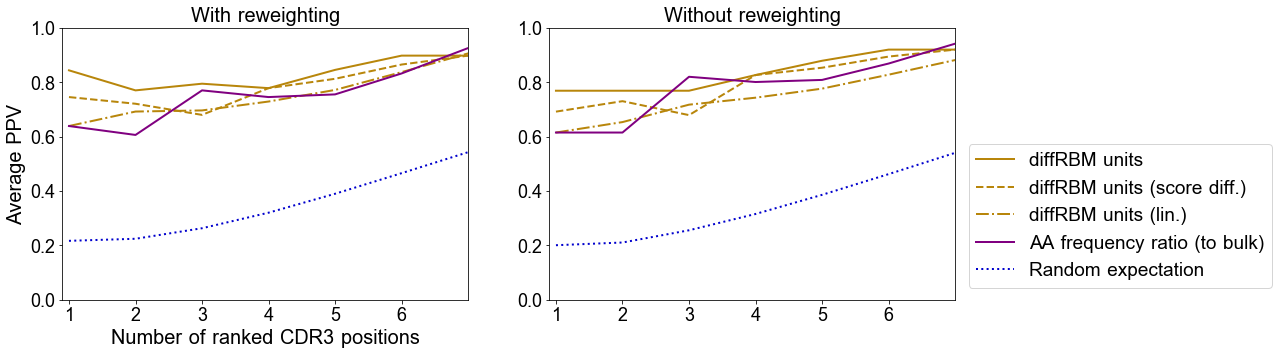

In [13]:
## Contact prediction ##

columns = ['Random', 'diffPWM', 'topRBM (lin)', 'topRBM2', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

s2=20
sl=2
fig, axess = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(16)
pepN = 'All'
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked CDR3 positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)
sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

ax.set_title('With reweighting', fontsize=s2)
pepN = 'All'
di = 4
th = 0
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')
ax.set_title('Without reweighting', fontsize=s2)

Text(0.5, 1.0, 'Influenza - GILGFVFTL')

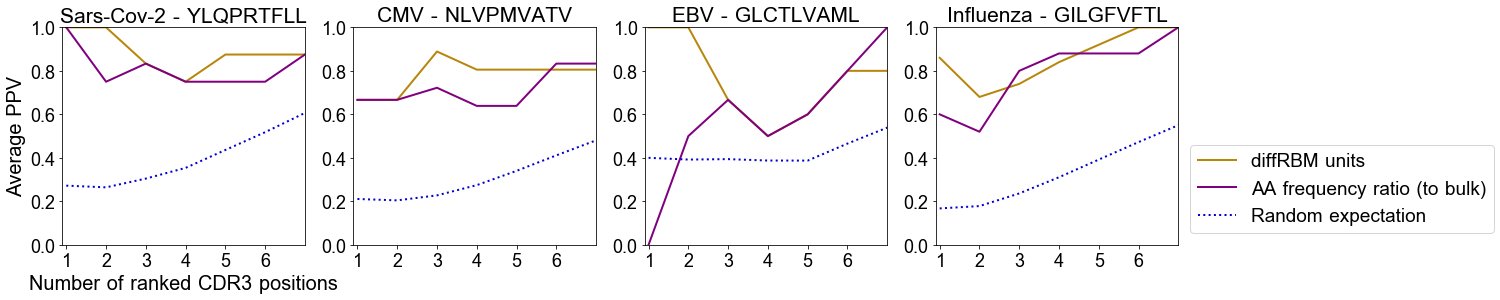

In [14]:
## Separate by peptide ##
columns = ['Random', 'diffPWM', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

fig, axess = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(20)


pepN = 'YLQPRTFLL'
pepV = 'Sars-Cov-2'
di = 4
th = 0.1
sl=2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked CDR3 positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)
sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(pepV + ' - ' + pepN, fontsize=s2+1)

pepN = 'NLVPMVATV'
pepV='CMV'
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(pepV + ' - ' + pepN, fontsize=s2+1)

pepN = 'GLCTLVAML'
pepV = 'EBV'
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(pepV + ' - ' + pepN, fontsize=s2+1)

pepN = 'GILGFVFTL'
pepV = 'Influenza'
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')


ax = axess[3]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')
sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(pepV + ' - ' + pepN, fontsize=s2+1)

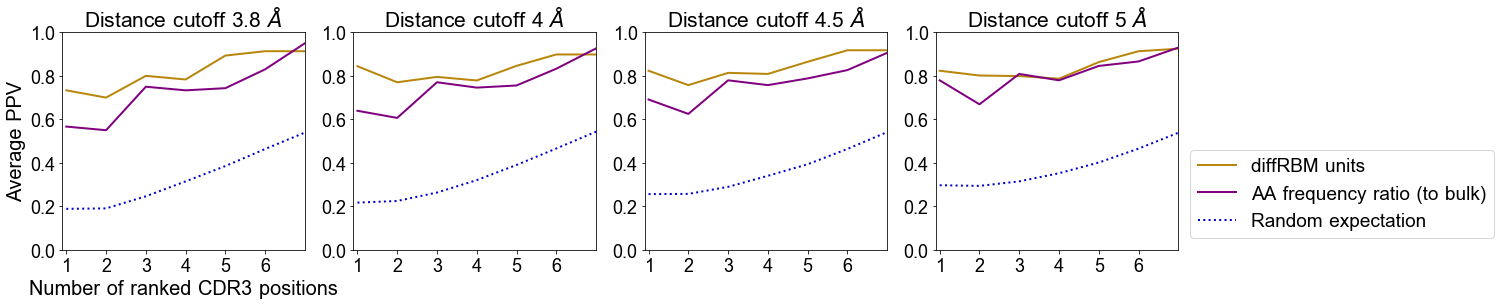

In [15]:
## Robustness to distance cutoff ##

columns = ['Random', 'diffPWM', 'topRBM1']

columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

fig, axess = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(20)

pepN = 'All'
di = 3.8
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked CDR3 positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)
sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

pepN = 'All'
di = 4
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')


ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

pepN = 'All'
di = 4.5
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)
    
    
pepN = 'All'
di = 5
th = 0.1
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + pepN + '_rew' + str(th) + '.tsv', sep='\t')

ax = axess[3]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)
  
sa=6
ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')

Contact prediction for peptides to TCR

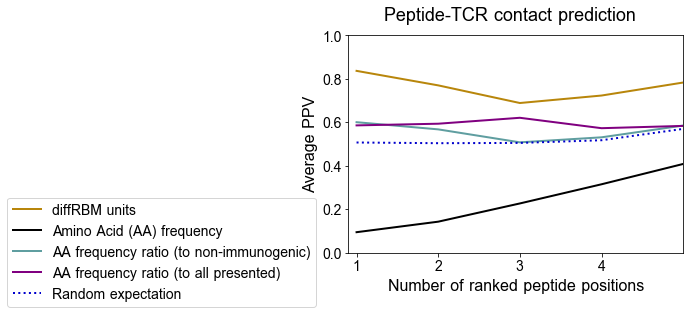

In [16]:
## Set the notation ##
columns = ['Random','Frequency', 'diffPWM', 'diffPWM_p', 'topRBM (lin)', 'topRBM2', 'topRBM1']
columns_name = ['Random expectation', freq_text, name_enrich +sle+'all presented'+sri, name_enrich + sle + 'non-immunogenic'+ sri, name_top + ' (lin.)', name_top + ' ' + name_eq9, name_top]
styles = [':', '-', '-','-','-.', '--','-']
colors = [col_rand,'k','Purple',col_enrich,col_top,col_top,col_top]

dict_names = {columns[i]:columns_name[i] for i in range(len(columns))}
dict_styles = {columns[i]:styles[i] for i in range(len(columns))}
dict_colors = {columns[i]:colors[i] for i in range(len(columns))}

ii = columns.index('diffPWM')
enrich_pres = columns_name[ii]
ii = columns.index('diffPWM_p')
enrich_ni = columns_name[ii]
ii = columns.index('topRBM1')
label_top = columns_name[ii]

## Contact prediction - peptide ##

HLAN = 'All'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t')

columns = ['Random', 'diffPWM', 'diffPWM_p','Frequency', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4
sl=2
s2=16

fig,ax=plt.subplots()
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    plt.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

plt.xlabel('Number of ranked peptide positions', fontsize=s2)
plt.ylabel('Average PPV', fontsize=s2)
plt.suptitle('Peptide-TCR contact prediction', fontsize=s2+2)
ax.legend(fontsize = s2-2,bbox_to_anchor=(-1.04, -0.28), loc='lower left')
plt.xlim([-0.1,sa])
plt.ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

/tmp/ipykernel_8143/43004893.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


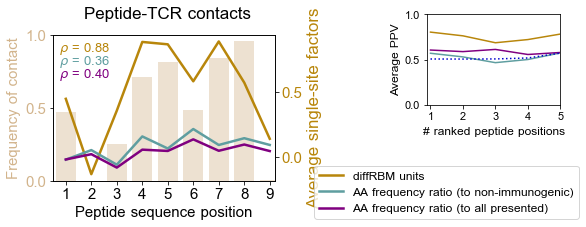

In [17]:
s2=18
HLAN = 'HLA-A*02:01'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '_SS.tsv', sep='\t')

sym = df['sym'].values
freqs = df['freqs'].values
pred_diffpwm2 = df['pred_diffpwm2'].values
pred_diffpwm1 = df['pred_diffpwm1'].values
pred_rbm = df['pred_rbm'].values

fig,ax1=plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(8.8)

color=color_freq
ax1.bar(sym,freqs, color=color, alpha=alpha_col)
ax1.set_xlabel('Peptide sequence position',fontsize=s2-3)
ax1.set_ylabel('Frequency of contact',fontsize=s2-3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks([0,0.5,1])

ax1.set_xlim([0.5,9.2])
ax1.set_xticks(np.arange(1,9+1))
ax1.set_xticklabels(list(np.arange(1,9+1)))

ax2= ax1.twinx()

plt.figtext(0.27, 1.02, 'Peptide-TCR contacts', ha='center', va='center', fontsize = s2-1)

color = colors[columns.index('topRBM1')]
ax2.plot(sym,pred_rbm,color=color,linewidth=2.5, label = label_top)
nn = np.corrcoef(freqs,pred_rbm)[0,1]
plt.figtext(0.14, 0.86, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-5)

color = colors[columns.index('diffPWM_p')]
ax2.plot(sym,pred_diffpwm2,color=color,linewidth=2.5, label=enrich_ni)
nn = np.corrcoef(freqs,pred_diffpwm2)[0,1]
plt.figtext(0.14, 0.8, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-5)

color = colors[columns.index('diffPWM')]
ax2.plot(sym,pred_diffpwm1,color=color,linewidth=2.5, label=enrich_pres)
nn = np.corrcoef(freqs,pred_diffpwm1)[0,1]
plt.figtext(0.14, 0.74, r'$\rho$ = ' + "{:.2f}".format(nn), ha='center', va='center', color = color, fontsize = s2-5)

color = colors[columns.index('topRBM1')]
ax2.set_ylabel('Average single-site factors',fontsize=s2-1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.tick_params(axis='both', which='major', labelsize = s2-3)
ax2.tick_params(axis='both', which='major', labelsize = s2-3)
ax1.set_ylim([0,1])
ax2.legend(fontsize=s2-6,bbox_to_anchor=(1.15, -0.3), loc='lower left')

axin1 = fig.add_axes([0.68, 0.6, 0.21, 0.42]) 
axin1.set_yticks([0,0.5,1])

## Contact prediction - peptide ##

HLAN = 'HLA-A*02:01'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t')

columns = ['Random', 'diffPWM', 'diffPWM_p', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4

#fig,ax=plt.subplots()
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    axin1.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u])

axin1.set_xlabel('# ranked peptide positions', fontsize=s2-6)
axin1.set_ylabel('Average PPV', fontsize=s2-6)

axin1.set_xlim([-0.1,sa])
axin1.set_ylim([0.,1])
axin1.set_xticks(list(np.arange(sa+1)))
axin1.set_xticklabels(np.arange(sa+1) + 1)
axin1.tick_params(axis='both', which='major', labelsize = s2-7)
fig.tight_layout()

Text(0.5, 1.0, 'Without reweighting')

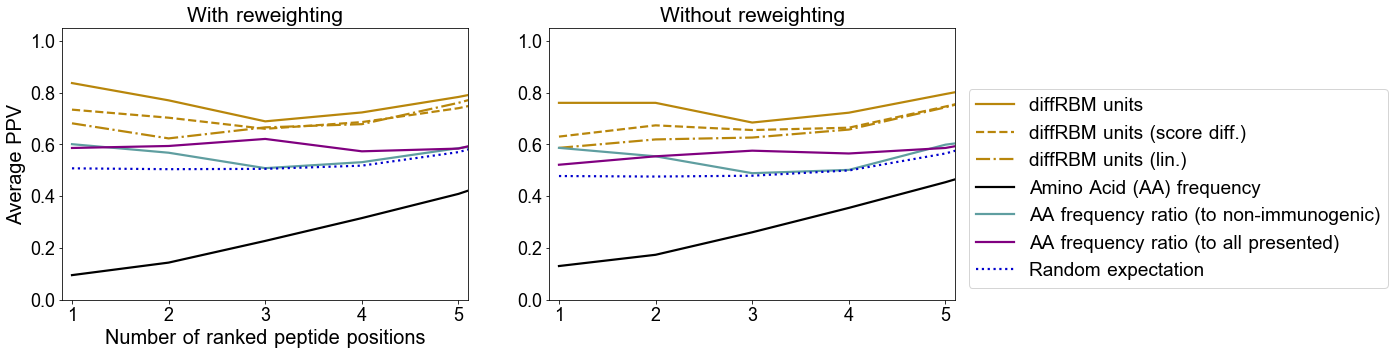

In [18]:
## reweighting ##

columns = ['Random', 'diffPWM', 'diffPWM_p', 'Frequency', 'topRBM (lin)', 'topRBM2', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4.1
topy=1.05
s2=20
fig, axess = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(16)

HLAN = 'All'
di = 4
th = 0.2
sl=2.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
   # print(ppv)
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)
#ax.legend(fontsize=s2-3,bbox_to_anchor=(1.01, 0.01), loc='lower left')

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title('With reweighting', fontsize=s2+1)

HLAN = 'All'
di = 4
th = 0
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')
ax.set_title('Without reweighting', fontsize=s2+1)

Text(0.5, 1.0, 'HLA-A*02:01')

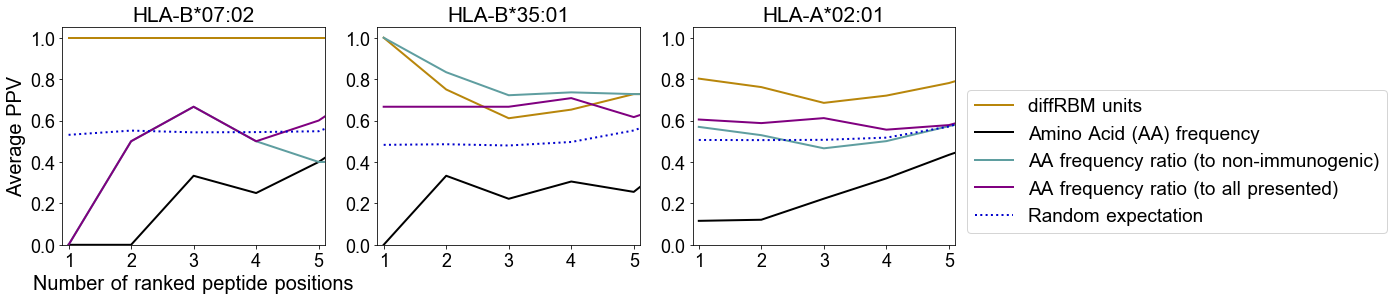

In [19]:
## Separate by HLA ##

columns = ['Random', 'diffPWM', 'diffPWM_p','Frequency', 'topRBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4.1
sl=2
topy=1.05
fig, axess = plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(16)

HLAN = 'HLA-B*07:02'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(HLAN, fontsize=s2+1)

HLAN = 'HLA-B*35:01'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(HLAN, fontsize=s2+1)

HLAN = 'HLA-A*02:01'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')
ax.set_title(HLAN, fontsize=s2+1)

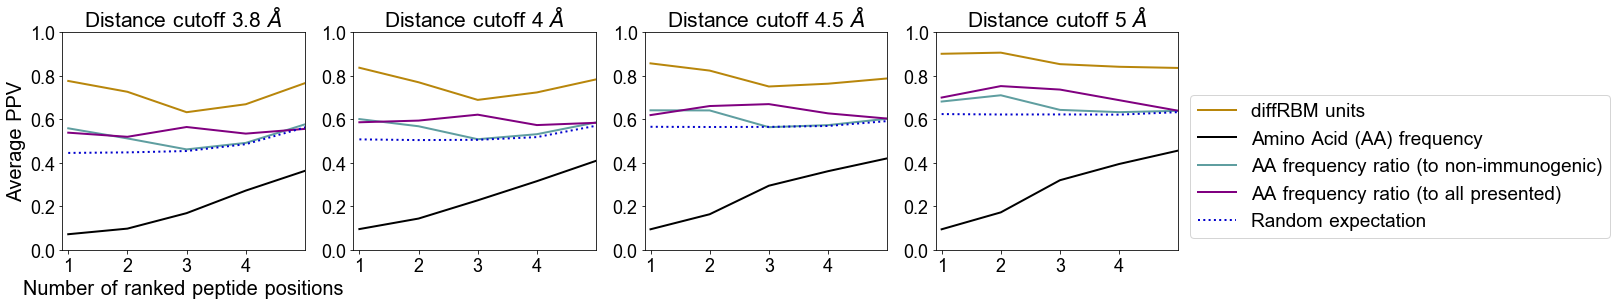

In [20]:
## Robustness to distance cutoff - contacts ##

columns = ['Random', 'diffPWM', 'diffPWM_p','Frequency', 'topRBM1']

columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]
sa=4
sl=2
fig, axess = plt.subplots(1,4)
fig.set_figheight(4)
fig.set_figwidth(20)

HLAN = 'All'
di = 3.8
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

HLAN = 'All'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

HLAN = 'All'
di = 4.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)


HLAN = 'All'
di = 5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[3]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')

Contacts of peptides to HLA

In [21]:
## Set the notation ##
columns = ['Random','Frequency', 'RBM (lin)', 'RBM2', 'RBM1']

columns_name = ['Random expectation', freq_text2, 'background RBM (lin.)', 'background RBM ' + name_eq9, 'background RBM']
styles = [':', '-', '-.', '--','-']
colors = [col_rand,'k',col_back,col_back,col_back]

dict_names = {columns[i]:columns_name[i] for i in range(len(columns))}
dict_styles = {columns[i]:styles[i] for i in range(len(columns))}
dict_colors = {columns[i]:colors[i] for i in range(len(columns))}

ii = columns.index('RBM (lin)')
label_back = columns_name[ii][:-6]
ii = columns.index('Frequency')
label_aa_freq = columns_name[ii]

/tmp/ipykernel_8143/2010385834.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


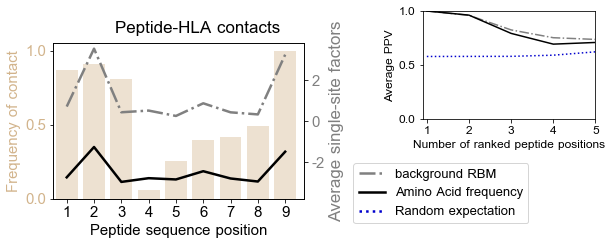

In [22]:
s2=18
HLAN = 'HLA-A*02:01'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contacts_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '_SS.tsv', sep='\t')

sym = df['sym'].values
freqs = df['freqs'].values
pred_diffpwm2 = df['pred_diffpwm2'].values
pred_diffpwm1 = df['pred_diffpwm1'].values
pred_rbm = df['pred_rbm'].values

fig,ax1=plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(8)
plt.figtext(0.35, 1.02, 'Peptide-HLA contacts', ha='center', va='center', fontsize = s2-1)


HLAN = 'HLA-A*02:01'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '_SS.tsv', sep='\t')

columns0 = ['sym','freqs_hla', 'pred_freq', 'pred_rbm']
sym = df['sym'].values
freqs_hla = df['freqs_hla'].values
pred_freq = df['pred_freq'].values
pred_rbm = df['pred_rbm'].values

color=color_freq
ax1.bar(sym,freqs_hla, color=color,alpha=alpha_col)
ax1.set_xlabel('Peptide sequence position',fontsize=s2-3)
ax1.set_ylabel('Frequency of contact',fontsize=s2-3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks([0,0.5,1])
ax2= ax1.twinx()

color = colors[columns.index('RBM (lin)')]
ax2.set_ylabel('Average single-site factors',fontsize=s2-1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(sym, pred_rbm,'-.', color=color,linewidth=2.5, label=label_back)
color = colors[columns.index('Frequency')]
ax2.plot(sym, pred_freq,color=color,linewidth=2.5, label=label_aa_freq)
r=columns_name.index('Random expectation')
ax2.plot(sym, -10*pred_freq,styles[r],color=colors[r],linewidth=2.5, label=columns_name[r] )

ax1.tick_params(axis='both', which='major', labelsize = s2-3)
ax2.tick_params(axis='both', which='major', labelsize = s2-3)
ax1.set_xticks(list(1 + np.arange(9)))
ax1.set_xticklabels(np.arange(9) + 1)
ax1.set_ylim([0,1.05])
TT=3.8
ax2.set_ylim([-TT,TT])
ax2.legend(fontsize=s2-5,bbox_to_anchor=(1.17, -0.2), loc='lower left')
nn = np.corrcoef(freqs_hla,pred_rbm)[0,1]
color = colors[columns.index('RBM (lin)')]
nn = np.corrcoef(freqs_hla,pred_freq)[0,1]
color = colors[columns.index('Frequency')]

ax1.set_xlim([0.5,9.7])
axin1 = fig.add_axes([0.74, 0.6, 0.3, 0.5]) 
axin1.set_yticks([0,0.5,1])
## Contact prediction - peptide ##

columns = ['Random','Frequency', 'RBM (lin)']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

HLAN = 'HLA-A*02:01'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t')

sa=4.1
topy=1.05
sa=4

for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    axin1.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u])

axin1.set_xlabel('Number of ranked peptide positions', fontsize=s2-6)
axin1.set_ylabel('Average PPV', fontsize=s2-6)
axin1.set_xlim([-0.1,sa])
axin1.set_ylim([0.,1])
axin1.set_xticks(list(np.arange(sa+1)))
axin1.set_xticklabels(np.arange(sa+1) + 1)
axin1.tick_params(axis='both', which='major', labelsize = s2-6)
fig.tight_layout()

Text(0.5, 1.0, 'Without reweighting')

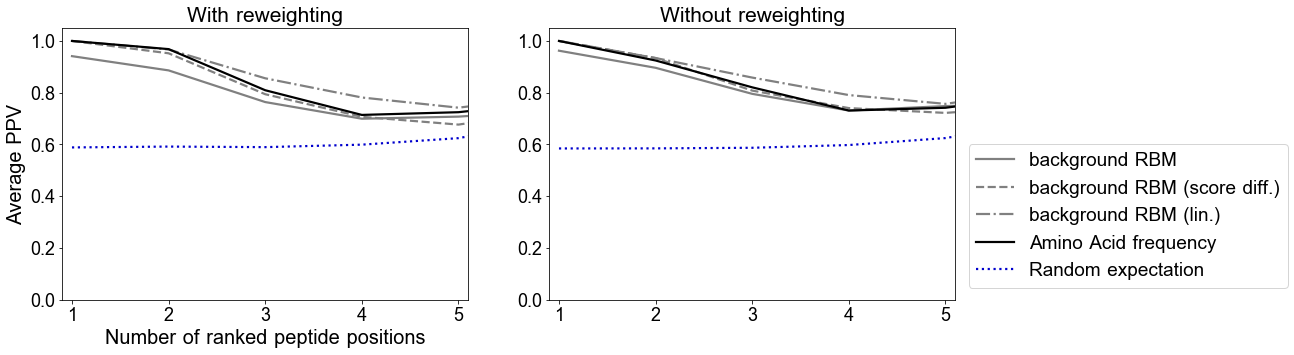

In [23]:
## reweighting ##

columns = ['Random','Frequency', 'RBM (lin)', 'RBM2', 'RBM1']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]
s2 = 20
sa=4.1
topy=1.05
sl=2.2

fig, axess = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(16)

HLAN = 'All'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)
ax.set_title('With reweighting', fontsize=s2+1)
ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)

HLAN = 'All'
di = 3.5
th = 0
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa) + 1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')
ax.set_title('Without reweighting', fontsize=s2+1)

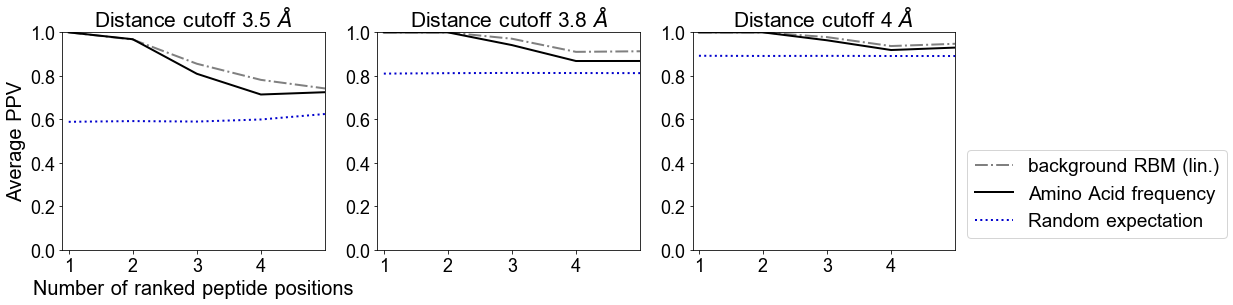

In [24]:
## Robustness to distance cutoff - HLA contacts ##

columns = ['Random','Frequency', 'RBM (lin)']

columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4
sl=2

fig, axess = plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(16)

HLAN = 'All'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

HLAN = 'All'
di = 3.8
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 


ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)

HLAN = 'All'
di = 4
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,1])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels((np.arange(sa)+1).astype(int))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(r'Distance cutoff ' + str(di) + ' $\AA$', fontsize=s2+1)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')

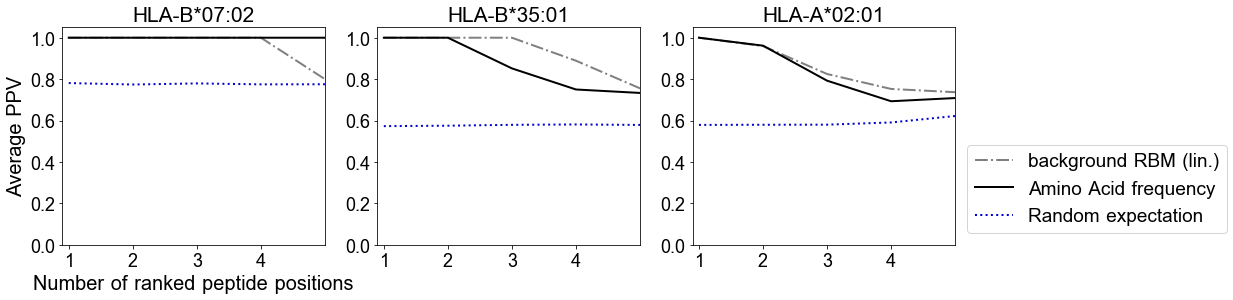

In [25]:
## Robustness to distance cutoff - HLA contacts ##

columns = ['Random','Frequency', 'RBM (lin)']
columns_name = [dict_names[columns[o]] for o in range(len(columns))]
styles = [dict_styles[columns[o]] for o in range(len(columns))]
colors = [dict_colors[columns[o]] for o in range(len(columns))]

sa=4
sl=2

topy=1.05

fig, axess = plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(16)

HLAN = 'HLA-B*07:02'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[0]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlabel('Number of ranked peptide positions', fontsize=s2)
ax.set_ylabel('Average PPV', fontsize=s2)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(HLAN, fontsize=s2+1)


HLAN = 'HLA-B*35:01'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[1]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(HLAN, fontsize=s2+1)


HLAN = 'HLA-A*02:01'
di = 3.5
th = 0.2
df = pd.read_csv(rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/Results/prediction_contactsHLA_ang' + str(di) + '_pep' + HLAN + '_rew' + str(th) + '.tsv', sep='\t') 

ax = axess[2]
for u in range(1,len(columns)+1):
    col = colors[-u]
    ppv=df[columns[-u]].values
    ax.plot(np.arange(len(ppv)), ppv, styles[-u], c = col, label= columns_name[-u], lw=sl)

ax.set_xlim([-0.1,sa])
ax.set_ylim([0.,topy])
ax.set_xticks(list(np.arange(sa)))
ax.set_xticklabels(np.arange(sa) + 1)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title(HLAN, fontsize=s2+1)
ax.legend(fontsize=s2-1,bbox_to_anchor=(1.01, 0.01), loc='lower left')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


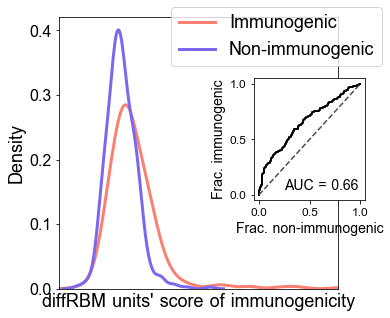

In [26]:
## Figure with density plots of scores ##

name_neg = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/IEDB_HLA-A*02:01/models_9.5/lik_neg_nh10_l120.01_RW0_ZFFalse_TR80_repl4.txt'
name_pos = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/IEDB_HLA-A*02:01/models_9.5/lik_pos_nh10_l120.01_RW0_ZFFalse_TR80_repl4.txt'
llp= np.loadtxt(name_pos)
lln= np.loadtxt(name_neg)
labels = np.hstack((np.ones((len(llp))), np.zeros((len(lln))) )) 
scores = np.hstack((llp, lln))
fpr, tpr, thresholds = metrics.roc_curve(labels, scores)

import seaborn as sns
s2=18
w=3

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

histv=False
sns.distplot(llp, hist = histv, kde_kws = {'linewidth': w}, color = 'Salmon', label = 'Immunogenic', ax = ax)
sns.distplot(lln, hist = histv, kde_kws = {'linewidth': w}, color = 'MediumSlateBlue', label = 'Non-immunogenic', ax = ax)
ax.set_xlabel(name_top + r"' score of immunogenicity", fontsize=s2)
ax.set_ylabel('Density', fontsize=s2)
ax.legend(fontsize=s2, markerscale=3, frameon=True, loc='best', bbox_to_anchor=(1.19, 1.07))
ax.set_xticks(np.arange(-40,-10,5))
ax.tick_params(axis='both', which='major', labelsize=s2-2)
ax.set_xticks([])

ax.set_xlim([-2,18])
s2=14
w=2
axins = ax.inset_axes([0.7, 0.325, 0.4, 0.45])
axins.plot(fpr,tpr,lw=w,color='k')
axins.set_xlabel('Frac. non-immunogenic', fontsize=s2)
axins.set_ylabel('Frac. immunogenic', fontsize=s2)
axins.plot([0,1], [0,1], ls="--", c=".3")
axins.set_yticks([0,0.5,1])
axins.tick_params(axis='both', which='major', labelsize=s2-2)
axins.text(0.25, 0.05, 'AUC = ' + format(metrics.auc(fpr, tpr), '.2f'), fontsize=s2);

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


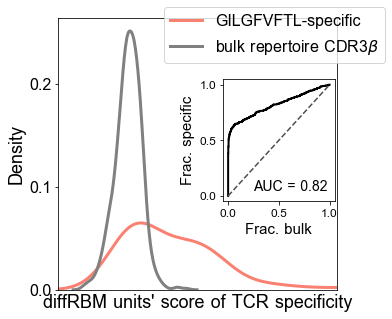

In [27]:
name_neg = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_GILGFVFTL/_lik_neg_nh20_l120.01_ZFFalse_RW0_TR80withVJ_repl10.txt'
name_pos = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_GILGFVFTL/_lik_pos_nh20_l120.01_ZFFalse_RW0_TR80withVJ_repl10.txt'
lln=np.loadtxt(name_neg)
llp=np.loadtxt(name_pos)

labels = np.hstack((np.ones((len(llp))), np.zeros((len(lln))) )) 
scores = np.hstack((llp, lln))
fpr, tpr, thresholds = metrics.roc_curve(labels, scores)

import seaborn as sns
s2=16
w=3

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

histv=False
sns.distplot(llp, hist = histv, kde_kws = {'linewidth': w}, color = 'Salmon', label = 'GILGFVFTL-specific', ax = ax)
sns.distplot(lln, hist = histv, kde_kws = {'linewidth': w}, color = 'Gray' , label = name_generic_tcr + r' repertoire CDR3$\beta$', ax = ax)
ax.set_xlabel(name_top + r"' score of TCR specificity", fontsize=s2+2)
ax.set_ylabel('Density', fontsize=s2+2)
ax.set_xticks([])
ax.set_yticks([0,0.1,0.2])
ax.legend(fontsize=s2, markerscale=3, frameon=True, loc='best', bbox_to_anchor=(1.2, 1.07))
ax.tick_params(axis='both', which='major', labelsize=s2)

ax.set_xlim([-325,-290])
s2=14
w=2
axins = ax.inset_axes([0.59, 0.325, 0.4, 0.45])
axins.plot(fpr,tpr,lw=w,color='k')
axins.set_xlabel('Frac. ' + name_generic_tcr, fontsize=s2+1)
axins.set_ylabel('Frac. specific', fontsize=s2+1)
axins.plot([0,1], [0,1], ls="--", c=".3")
axins.set_yticks([0,0.5,1])
axins.tick_params(axis='both', which='major', labelsize=s2-2)
axins.text(0.25, 0.05, 'AUC = ' + format(metrics.auc(fpr, tpr), '.2f'), fontsize=s2);

[Text(0, 0, 'TCR1'), Text(1, 0, 'TCR2'), Text(2, 0, 'TCR3')]

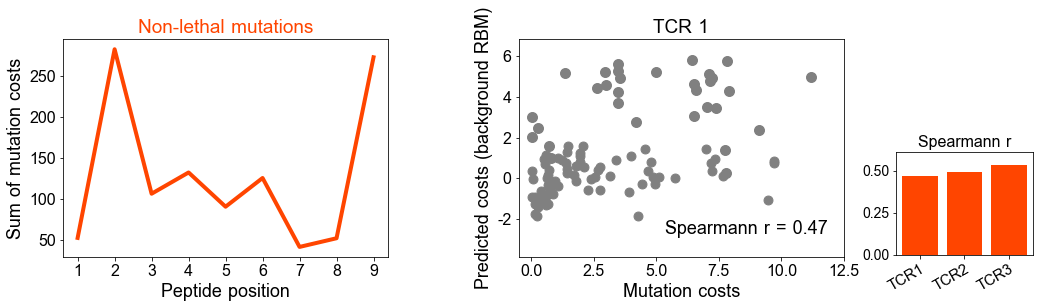

In [28]:
HLA='HLA-A*02:01'
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist, I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
name_mf='/Mutagenesis'
list_tcrs=[0,1,2]
s2=18
colors=['OrangeRed','MediumSeaGreen']

import scipy
mat_pos_w = np.loadtxt(name_folder + name_mf + '/Results_files/mat_pos_w.txt')

ylabel_back = 'Predicted costs (background RBM)'
s2=18
ww=4
fig, axes =plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4)
ax=axes[0]
ax.set_ylabel('Sum of mutation costs', fontsize = s2)
ax.set_xlabel('Peptide position', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_xticks(list(np.arange(9)))
ax.set_xticklabels(list(np.arange(9)+1))
ax.plot(np.arange(9),np.sum(mat_pos_w, axis=0), c = colors[0], lw=ww)
ax.set_title('Non-lethal mutations', fontsize = s2+1, c = colors[0])

h=0
ax=axes[1]
pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsP'+str(h)+'.txt')
pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsT'+str(h)+'.txt')

ax.scatter(pointsP, -pointsT,  s = 80, facecolors='gray',label = 'Non-anchor sites')
sr = scipy.stats.spearmanr(pointsP, -pointsT)[0]
pv = scipy.stats.spearmanr(pointsP, -pointsT)[1]
ax.set_ylim([np.min(-pointsT)-2,np.max(-pointsT)+1])

pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsP' + str(h) + '_18.txt')
pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsT' + str(h) + '_18.txt')

ax.scatter(pointsP, -pointsT, s = 80, facecolors='gray', linewidths=2, label = 'Anchor sites')
ax.text(0.7, 0.13, 'Spearmann r = ' + "{:.2f}".format(sr), ha='center', va='center', color = 'k', fontsize = s2, transform=ax.transAxes);
if h==0:
    ax.set_ylabel(ylabel_back, fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_title('TCR ' + str(h+1), fontsize = s2+1);
ax.set_xlim([-0.5,12.5])
ax.set_xlabel('Mutation costs', fontsize = s2)
axins = ax.inset_axes([1.16, 0.01, 0.42, 0.47])
list_sr=[]
for h in list_tcrs:
    pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsP'+str(h)+'.txt')
    pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsT'+str(h)+'.txt')
    sr = scipy.stats.spearmanr(pointsP, -pointsT)[0]
    pv = scipy.stats.spearmanr(pointsP, -pointsT)[1]
    list_sr.append(sr)                                            
axins.bar(np.array(list_tcrs), list_sr, color= colors[0])   
axins.set_xticks(np.array(list_tcrs))
axins.set_ylim([0,0.61])
axins.tick_params(axis='both', which='major', labelsize = s2-4)
labels=['TCR' + str(g+1) for g in list_tcrs]
axins.set_title('Spearmann r', fontsize = s2-2)
axins.set_xticklabels(labels, rotation = 30, fontsize  = s2-3, ha='right', rotation_mode = 'anchor')  

MannwhitneyuResult(statistic=145018846.0, pvalue=1.4861112775436951e-30)
p-value = 1e-30 *


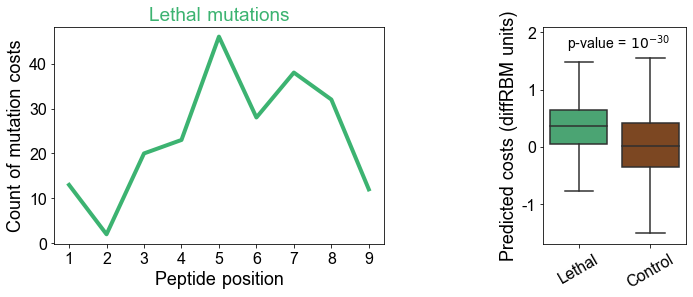

In [29]:
ylabel_top = 'Predicted costs ('+ name_top +')'
fig, axes =plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(13)
ax=axes[0]
mat_pos_s = np.loadtxt(name_folder + name_mf + '/Results_files/mat_pos_s.txt')
ax.set_ylabel('Count of mutation costs', fontsize = s2)
ax.set_xlabel('Peptide position', fontsize = s2)
ax.set_xticks(list(np.arange(9)))
ax.set_xticklabels(list(np.arange(9)+1))
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.plot(np.arange(9),np.sum(mat_pos_s, axis=0), c = colors[1], lw=ww)

ax.set_title('Lethal mutations', fontsize = s2+1, c=colors[1])

ax=axes[1]
import seaborn as sns
df1 = pd.read_csv(name_folder + name_mf + '/high_cost.tsv', sep='\t')
llp = df1[df1['name']=='Lethal']['score'].values
llc = df1[df1['name']=='Control']['score'].values
box = sns.boxplot(y='score', x= 'name', data=df1, showfliers = False,ax=ax, palette = [colors[1], 'SaddleBrown'])


ax.set_ylabel(ylabel_top, fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.tick_params(axis='x', labelrotation = 30)
ax.set_aspect(0.8)
ax.set_ylim([-1.7,2.1])
ax.xaxis.label.set_visible(False)
from scipy import stats
print(stats.mannwhitneyu(llp,llc))
sr = stats.mannwhitneyu(llp,llc)[1]
print('p-value = ' + "{:.0e}".format(sr) + ' *')
ax.text(0.53, 0.92, 'p-value = $10^{-30}$', ha='center', va='center', color = 'k', fontsize = s2-4, transform=ax.transAxes);

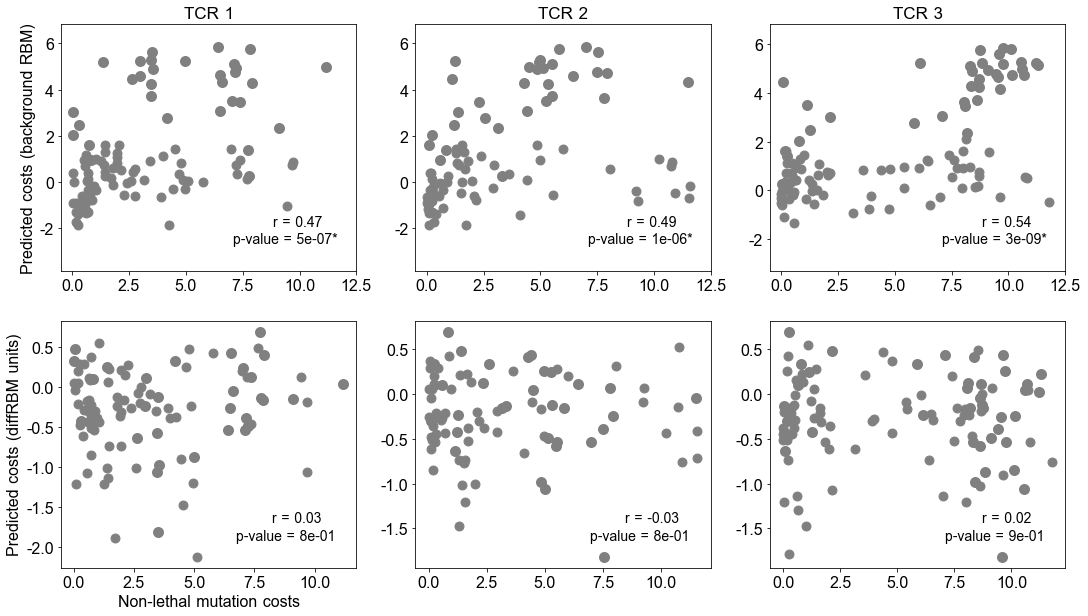

In [30]:
s2=16
fig, axes =plt.subplots(2,len(list_tcrs))
fig.set_figheight(10)
fig.set_figwidth(18)

for h in list_tcrs:
    
    ax = axes[0,h]
    pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsP'+str(h)+'.txt')
    pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsT'+str(h)+'.txt')

    ax.scatter(pointsP, -pointsT,  s = 80, facecolors='gray',label = 'Non-anchor sites')
    sr = scipy.stats.spearmanr(pointsP, -pointsT)[0]
    pv = scipy.stats.spearmanr(pointsP, -pointsT)[1]
    
    ax.set_ylim([np.min(-pointsT)-2,np.max(-pointsT)+1])
    
    pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsP' + str(h) + '_18.txt')
    pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/back_pointsT' + str(h) + '_18.txt')
    
    ax.scatter(pointsP, -pointsT, s = 80, facecolors='gray', linewidths=2, label = 'Anchor sites')

    ax.text(0.8, 0.2, 'r = ' + "{:.2f}".format(sr), ha='center', va='center', color = 'k', fontsize = s2-2, transform=ax.transAxes);
    ax.text(0.76, 0.13, 'p-value = ' + "{:.0e}".format(pv)+ '*', ha='center', va='center', color = 'k', fontsize = s2-2, transform=ax.transAxes);
    if h==0:
        ax.set_ylabel(ylabel_back, fontsize = s2)
    ax.tick_params(axis='both', which='major', labelsize = s2)
    ax.set_title('TCR ' + str(h+1), fontsize = s2+1);
    ax.set_xlim([-0.5,12.5])
     
    ax = axes[1,h]
    
    pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/top_pointsP'+str(h)+'.txt')
    pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/top_pointsT'+str(h)+'.txt')
    
    ax.scatter(pointsP, -pointsT,  s = 80, facecolors='gray')
    sr = scipy.stats.spearmanr(pointsP, -pointsT)[0]
    pv = scipy.stats.spearmanr(pointsP, -pointsT)[1]
    
    pointsP = np.loadtxt(name_folder + name_mf + '/Results_files/top_pointsP' + str(h) + '_18.txt')
    pointsT = np.loadtxt(name_folder + name_mf + '/Results_files/top_pointsT' + str(h) + '_18.txt')
    ax.scatter(pointsP, -pointsT, s = 80, facecolors='gray', linewidths=2)
    
    ax.text(0.8, 0.2, 'r = ' + "{:.2f}".format(sr), ha='center', va='center', color = 'k', fontsize = s2-2, transform=ax.transAxes);
    ax.text(0.76, 0.13, 'p-value = ' + "{:.0e}".format(pv), ha='center', va='center', color = 'k', fontsize = s2-2, transform=ax.transAxes);
    if h==0:
        ax.set_ylabel(ylabel_top, fontsize = s2)
        ax.set_xlabel('Non-lethal mutation costs', fontsize = s2)
    ax.tick_params(axis='both', which='major', labelsize = s2)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

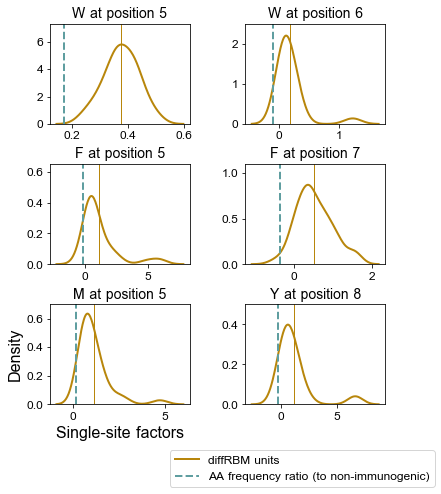

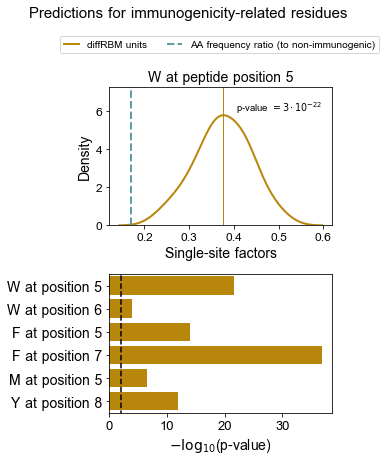

In [31]:
## distribution of single-site factors ##

gg = name_top.find(' units')
name_top2 = name_top

gg = name_top.find(' units')
name_top2 = name_top

aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
save_files=0
import seaborn as sns
from matplotlib.patches import Patch
from scipy import stats

HLA='HLA-A*02:01'
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
train_data = np.loadtxt(name_folder + '/pep_sel.txt').astype(np.int16)
data = np.copy(train_data)
colors = [col_enrich, col_top]
imp_comb = [['W',4],['W',5],['F',4],['F',6],['M',4],['Y',7]]

new_list = np.loadtxt(name_folder + '/Mutagenesis/topRBM_ssfactors.txt')
new_list2 = np.loadtxt(name_folder + '/Mutagenesis/PWMP_ssfactors.txt')

fig,axess=plt.subplots(3,2)
fig.set_figheight(7)
fig.set_figwidth(6)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

lw=2
hh=[7.3,2.5,0.65,1.1,0.7,0.5]
pvals=[]
labels_pvals=[]
for p in range(len(imp_comb)):
    
    ll= imp_comb[p][0]
    pos= imp_comb[p][1]
    
    if p%2==0:
        ax=axess[int(p/2),0]
    if p%2!=0:
        ax=axess[int(p/2),1]
        
    inds=[]
    for y in range(len(data)):
        if data[y,pos] == aa.index(ll):
            inds.append(y)
    sns.distplot(np.array(new_list)[inds,pos], hist = False, kde_kws = {'linewidth': lw}, color= colors[1], label = name_top2, ax=ax)
    
    num = np.unique(np.array(new_list2)[inds,pos])[0]
    
    pvals.append(stats.ttest_1samp(np.array(new_list)[inds,pos], num)[1])
    ax.vlines(x=num, ymin=0, ymax=hh[p], linestyle = '--', color= colors[0], linewidth=lw, label = name_enrich + sle + 'non-immunogenic'+ sri)
    ax.vlines(x=np.mean(np.array(new_list)[inds,pos]), ymin=0, ymax=hh[p], linestyle = '-', color= colors[1], linewidth=1)
    if p!=4:
        ax.set_ylabel('')
    if p==4:
        ax.set_ylabel('Density', fontsize=s2)
        ax.set_xlabel('Single-site factors', fontsize = s2)
    if p == len(imp_comb)-1:
        ax.legend(fontsize = s2-4, bbox_to_anchor=(1.4, -0.4))
    ax.set_ylim([0,hh[p]])
    labels_pvals.append(ll + ' at position ' + str(pos+1))
    ax.set_title(ll + ' at position ' + str(pos+1), fontsize = s2-2)
    ax.tick_params(axis='both', which='major', labelsize = s2-4)


HLA='HLA-A*02:01'
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
train_data = np.loadtxt(name_folder + '/pep_sel.txt').astype(np.int16)

data = np.copy(train_data)
colors = [col_enrich, col_top]
imp_comb = [['W',4],['W',5],['F',4],['F',6],['M',4],['Y',7]]

new_list = np.loadtxt(name_folder + '/Mutagenesis/topRBM_ssfactors.txt')
new_list2 = np.loadtxt(name_folder + '/Mutagenesis/PWMP_ssfactors.txt')

fig,axes=plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.35)
lw=2
hh=[7.3,2.5,0.65,1.1,0.7,0.5]
plt.figtext(0.4, 1.05, 'Predictions for immunogenicity-related residues', ha='center', va='center', fontsize = s2-1)

ax = axes[0]
for p in range(1):
    
    ll= imp_comb[p][0]
    pos= imp_comb[p][1]
        
    inds=[]
    for y in range(len(data)):
        if data[y,pos] == aa.index(ll):
            inds.append(y)
    sns.distplot(np.array(new_list)[inds,pos], hist = False, kde_kws = {'linewidth': lw}, color= colors[1], label = name_top2, ax=ax)
    
    num = np.unique(np.array(new_list2)[inds,pos])[0]
    
    pval = stats.ttest_1samp(np.array(new_list)[inds,pos], num)[1]
    ax.text(0.76, 0.85, r'p-value $=3\cdot 10^{-22}$', ha='center', va='center', color = 'k', fontsize = s2-6.5, transform=ax.transAxes);
    ax.vlines(x=num, ymin=0, ymax=hh[p], linestyle = '--', color= colors[0], linewidth=lw, label = name_enrich + sle + 'non-immunogenic'+ sri)
    ax.vlines(x=np.mean(np.array(new_list)[inds,pos]), ymin=0, ymax=hh[p], linestyle = '-', color= colors[1], linewidth=1)
    ax.set_ylabel('Density', fontsize=s2-2)
    ax.set_xlabel('Single-site factors', fontsize = s2-2)
    ax.legend(fontsize = s2-6,ncol=2, bbox_to_anchor=(1.23,1.4),handlelength=1.5)
    ax.set_ylim([0,hh[p]])
    ax.set_title(ll + ' at peptide position ' + str(pos+1), fontsize = s2-2)
    ax.tick_params(axis='both', which='major', labelsize = s2-4)

ax = axes[1]
ax.barh(np.arange(len(pvals)),-np.log10(pvals)[::-1], color = col_top)
ax.tick_params(axis='both', which='major', labelsize = s2-3)
ax.set_yticks(np.arange(len(pvals)))
ax.set_yticklabels(labels_pvals[::-1], rotation = 0, fontsize  = s2-2, ha='right', rotation_mode = 'anchor');
ax.set_xlabel(r'$-\log_{10}$(p-value)', fontsize = s2-2)
ax.vlines(x = -np.log10(0.01), ymin=-1, ymax=len(pvals)+1, linestyle = '--', color= 'k')
ax.set_ylim([-0.5,len(pvals)-0.5]);

/tmp/ipykernel_8143/3253668306.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  curr_int=np.int(16)
/tmp/ipykernel_8143/3253668306.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  aa_colors = np.array(aa_colors0)[ind0]


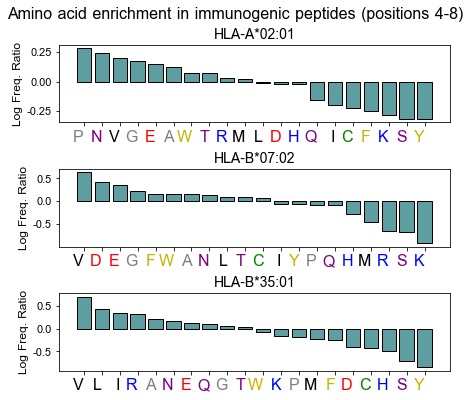

In [32]:
s2=16
curr_int=np.int(16)
def convert_letter(seqs_n): # convert to numbers already aligned seqs
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
    aadictinv = {k: aa[k] for k in range(len(aa))} 
    seqs=[]
    if type(seqs_n[0]) == curr_int:
        seqs.append(''.join([aadictinv[e] for e in seqs_n]))
    else:
        for t in range(len(seqs_n)):
            seqs.append(''.join([aadictinv[e] for e in seqs_n[t]]))
    return seqs

def aa_color(letter):
    if letter in ['C']:
        return 'green'
    elif letter in ['F','W','Y']:
        return [199/256., 182/256., 0.,1.]#'gold'
    elif letter in ['Q','N','S','T']:
        return 'purple'
    elif letter in ['V','L','I','M']:
        return 'black'
    elif letter in ['K','R','H']:
        return 'blue'
    elif letter in  ['D','E']:
        return 'red'
    elif letter in ['A','P','G']:
        return 'grey'
    elif letter in ['$\\boxminus$']:
        return 'black'
    else:
        return 'black'
    
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',  'W', 'Y','-']
aa_colors0 = [aa_color(a) for a in aa]

list_hlas=['HLA-A*02:01','HLA-B*07:02','HLA-B*35:01']

pep_sel=[]
pep_selN=[]

fig,axess=plt.subplots(3,1)
fig.set_figheight(6)
fig.set_figwidth(7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
plt.figtext(0.475, 0.95, 'Amino acid enrichment in immunogenic peptides (positions 4-8)', ha='center', va='center', fontsize = s2)

for p in range(len(list_hlas)):
    HLA = list_hlas[p]
    dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 
    name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset

    train_data = np.loadtxt(name_folder + '/pep_sel.txt').astype(np.int16)
    train_dataN = np.loadtxt(name_folder + '/pep_selN.txt').astype(np.int16)
    pep_sel+=convert_letter(train_data)
    pep_selN=convert_letter(train_dataN)

    pos_t = list(pep_sel)
    neg_t = list(pep_selN)
    enrich=[]
    for a in range(20):
        norm=0
        occ=0
        for pp in range(len(pos_t)):
            pep = pos_t[pp][3:9]
            occ += pep.count(aa[a])
            norm += len(pep)

        normN=0
        occN=0
        for pp in range(len(neg_t)):
            pep = neg_t[pp][3:9]
            occN += pep.count(aa[a])
            normN += len(pep)

        enrich.append(np.log((occ/norm)/(occN/normN)))

    ax = axess[p]
    ind0=np.argsort(enrich)[::-1]
    meth = np.array(aa)[ind0]
    meth_val = np.array(enrich)[ind0]
    aa_colors = np.array(aa_colors0)[ind0]

    fac=1
    x_pos = np.arange(0,fac*len(meth_val),fac)
    colors3 = list(np.repeat([col_enrich],len(meth)))
    sc = 2

    bars = ax.bar(x_pos, meth_val, alpha=1, edgecolor='k', align = 'center', capsize=sc, color = colors3)

    ax.set_xticks(x_pos)
    ax.set_ylabel('Log Freq. Ratio', fontsize = s2-4)
    ax.tick_params(axis='y', which='major', labelsize = s2-5)
    ax.set_xticklabels(meth, rotation = 0, fontsize  = s2, ha='right', rotation_mode = 'anchor')
    for u in range(len(meth)):
        ax.get_xticklabels()[u].set_color(aa_colors[u])
    ax.set_title(HLA, fontsize = s2-2)

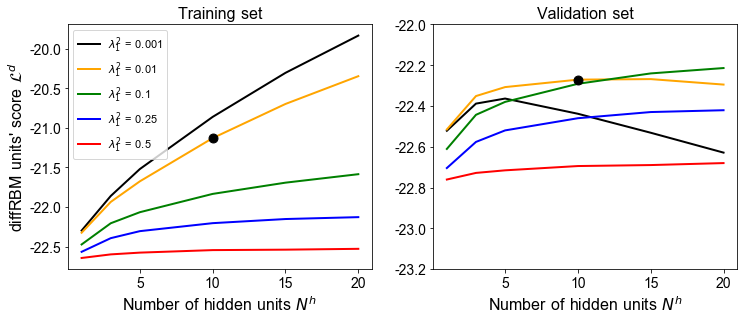

In [33]:
## Hyperparametric search ##

import sklearn
from sklearn import metrics

name_reg = u'$1/|\mathcal{D}^{s}|$'
name_fraction = u'Fraction $|\mathcal{D}^{s}|/|\mathcal{D}^{b}|$'

## First block: hyperparametric search (cross-validation) for single-allele ##

strin=''
final_hu = 10
final_l12 = 0.01
error_bar = 0 ## whether include error bar ##

HLA = 'HLA-A*02:01'
what_l2 = 'Standard'
what_l12 = 'Standard'
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 

name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
nr = name_folder + '/vary_hyper_positives_regfields_' + str(what_l2) + '_regweights_' + str(what_l12) + '_9.5_fin50.txt'
colors = ['k','orange','g','b','red','Maroon','Navy']
hyper = pd.read_csv(nr, sep = '\t')
head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))
listl12 = listl120
listhu = list(np.unique(hyper[head[index_hu]].values))
s2=16

w = 2
sc=40
fig, axess = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)


ax=axess[0]
stri = 'LLtr'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1['HU'].values
        liney = (h1['LLtr'].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.mean(h1[h1[head[index_hu]]==hh]['LLtr_s'].values))
    if error_bar:
        ax.errorbar(listhu, temp, yerr=temps, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
    else:
        ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.legend(fontsize=s2-5)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Training set', fontsize = s2)
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.set_ylabel(name_top + u"' score " + form_top, fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
    
ax=axess[1]
stri = 'LLval'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1['HU'].values
        liney = (h1['LLval'].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.mean(h1[h1[head[index_hu]]==hh]['LLval_s'].values))
    if error_bar:
        ax.errorbar(listhu, temp, yerr=temps, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
    else:
        ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Validation set', fontsize = s2)
ax.set_ylim([-23.2,-22])
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

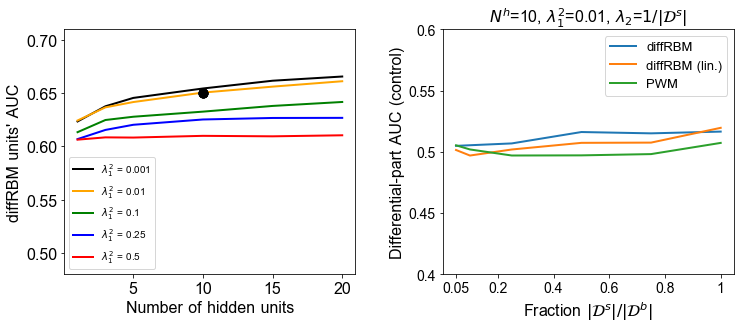

In [34]:
HLA = 'HLA-A*02:01'
what_l2 = 'Standard'
what_l12 = 'Standard'
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 

name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
nr =  name_folder + '/vary_hyper_positives_regfields_' + str(what_l2) + '_regweights_' + str(what_l12) + '_9.5_fin50.txt'

colors = ['k','orange','g','b','red','Maroon','Navy']
hyper = pd.read_csv(nr, sep = '\t')
head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))

listl12 = listl120
listhu = list(np.unique(hyper[head[index_hu]].values))

s2=16
w = 2
sc=40
fig, axess = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
stri = 'AUCtop'
ax=axess[0]
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.mean(h1[h1[head[index_hu]]==hh]['AUCtop_s'].values))
        linex = h1['HU'].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        
    ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
    if error_bar:
        ax.errorbar(listhu, temp, yerr = temps, c = colors[l], lw=w,  label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]))
    else:
        ax.errorbar(listhu, temp, c = colors[l], lw=w,  label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]))
    ax.legend(fontsize=s2-6)
    ax.set_xlabel('Number of hidden units', fontsize=s2)
    ax.set_ylabel(name_top + u"' AUC", fontsize=s2)
    ax.tick_params(axis='both', which='major', labelsize = s2)
    ax.set_ylim([0.48,0.71])
    
colors = ['k','orange','y','g','b','red','Maroon','Navy']

HLA = 'HLA-A*02:01'
what_l2 = 'Standard'
what_l12 = 'Standard'
hh = final_hu
lib = final_l12
dataset = 'IEDB_'+ HLA ## This is the name of the folder with the model; if does not exist I create it 
name_folder = rootf + '/diffRBM_immunogenicity_TCRspecificity/Immunogenicity_model/' + dataset
nr = name_folder + '/vary_hyper_sample_size_control_' + str(hh) + '_' + str(lib) + '.txt'
hyper = pd.read_csv(nr, sep = '\t')
head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))
listl12 = listl120
listhu = list(np.unique(hyper[head[index_hu]].values))
    
ax=axess[1]
l2f = np.unique(hyper['L2F'].values)
for what_l2 in ['Standard']:
    for what_l12 in ['Standard']:
        list_w=[]
        for ll in l2f:
            h2 = hyper[hyper['what_l2'] == what_l2]
            h30 = h2[h2['what_l12']==what_l12]
            h3 = h30[h30['L2F']==ll]
            list_frac = list(h3['RatioMt/Mb'].values)
            list_w = list(h3['AUCtop'].values)
            list_f_lin = list(h3['AUCtoplin'].values)
            list_f_fields = list(h3['AUCtoppwm'].values)
            list_w_s = list(h3['AUCtop_s'].values)
            list_f_lin_s = list(h3['AUCtoplin_s'].values)
            list_f_fields_s = list(h3['AUCtoppwm_s'].values)
        if error_bar:
            ax.errorbar(list_frac, list_w, yerr=list_w_s, label= 'Differential RBM', lw=w)
            ax.errorbar(list_frac, list_f_lin, yerr=list_f_lin_s, label= 'Differential RBM (lin)', lw=w)
            ax.errorbar(list_frac, list_f_fields, yerr=list_f_fields_s, label= 'Differential PWM',lw=w)
        else:
            ax.plot(list_frac, list_w, label= 'diffRBM', lw=w)
            ax.plot(list_frac, list_f_lin, label= 'diffRBM (lin.)', lw=w)
            ax.plot(list_frac, list_f_fields, label= 'PWM',lw=w)
ax.set_title(u'$N^h$=' + str(final_hu) + ', $\lambda_{1}^{2}$=' + str(final_l12) + ', $\lambda_{2}$=' + name_reg, fontsize = s2)
ax.set_xlabel(name_fraction, fontsize = s2)
ax.set_ylabel(adjective_top + u'-part AUC (control)', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_ylim([0.4,0.6])
ax.set_yticks([0.40,0.45,0.50,0.55,0.60])
ax.set_yticklabels([0.40,0.45,0.50,0.55,0.60])
ax.legend(fontsize=s2-3)
ax.set_xticks([0.05,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels([0.05,0.2,0.4,0.6,0.8,1]);

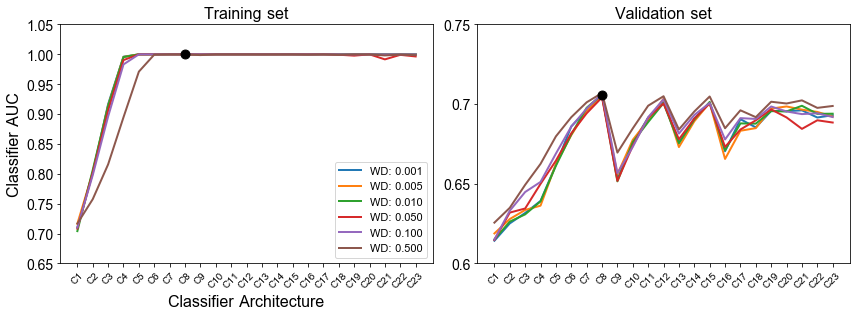

In [35]:
## Classifier Hyper parametric ##

aucs_list  = pd.read_csv(name_folder + '/models_9.5/classifier_hyper/aucs_list.csv')
Ni = len(np.unique((aucs_list['Model'].values)))
wdecs = np.unique((aucs_list['WeightDecay'].values))
model_idx=0

aucs_train_stats={}
for model_idx in range(Ni):
    for weight_decay in wdecs:
        a = aucs_list[aucs_list['Model'] == model_idx]
        aa = a[a['WeightDecay']==weight_decay]
        aucs_train_stats.update({(model_idx, weight_decay):{'mean':np.mean(aa['AUC_Train'].values),'err':np.std(aa['AUC_Train'].values)}})
        
aucs_tests_stats={}
for model_idx in range(Ni):
    for weight_decay in wdecs:
        a = aucs_list[aucs_list['Model'] == model_idx]
        aa = a[a['WeightDecay']==weight_decay]
        aucs_tests_stats.update({(model_idx, weight_decay):{'mean':np.mean(aa['AUC_Valid'].values),'err':np.std(aa['AUC_Valid'].values)}})

s2=16
sc=40
x_pos = np.arange(Ni)
barlabels = ['C' + str(x+1) for x in x_pos]
fig, axx = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)
for (wi, wd) in enumerate(wdecs):
    ax=axx[0]
    if error_bar:
        ax.errorbar(x_pos, [aucs_train_stats[m, wd]['mean'] for m in range(Ni)], yerr=[aucs_train_stats[m, wd]['err'] for m in range(Ni)], alpha=0.99, capsize=1, label = 'WD: ' + str(format(wd,'.3f')), lw=w)
    else:
        ax.plot(x_pos, [aucs_train_stats[m, wd]['mean'] for m in range(Ni)], alpha=0.99, label = 'WD: ' + str(format(wd,'.3f')), lw=w)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(barlabels, fontsize = s2-6, rotation='45')
    ax.set_ylim(0.65, 1.05)
    ax.set_ylabel(u'Classifier AUC', fontsize = s2)
    ax.tick_params(axis='y', which='major', labelsize = s2-2)
    ax.set_xlabel(u'Classifier Architecture', fontsize = s2)
    ax.set_title(u'Training set', fontsize = s2)
    ax.legend(fontsize=s2-5)
    

wd=wdecs[list(wdecs).index(0.01)]
m=7
ax.scatter(m, aucs_train_stats[m, wd]['mean'], color = 'k', zorder=6, s=2*sc, edgecolor='k')

lista=[]
for (wi, wd) in enumerate(wdecs):
    ax=axx[1]
    lista.append([aucs_tests_stats[m, wd]['mean'] for m in range(Ni)])
    if error_bar:
        ax.errorbar(x_pos, [aucs_tests_stats[m, wd]['mean'] for m in range(Ni)], yerr=[aucs_tests_stats[m, wd]['err'] for m in range(Ni)], alpha=0.99, capsize=1, label = wd, lw=w)
    else:
        ax.plot(x_pos, [aucs_tests_stats[m, wd]['mean'] for m in range(Ni)], alpha=0.99, label = wd, lw=w)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(barlabels, fontsize = s2-6, rotation='45')
    ax.set_ylim(0.61, 0.75)
    ax.set_title(u'Validation set', fontsize = s2)
    ax.tick_params(axis='y', which='major', labelsize = s2-2)
    
ax.set_yticks(np.arange(0.6,0.75,0.05))
ax.set_yticklabels([0.60,0.65,0.70,0.75])

wd=wdecs[list(wdecs).index(0.01)]
m=7
ax.scatter(m, aucs_tests_stats[m, wd]['mean'], color = 'k', zorder=6, s=2*sc, edgecolor='k')
plt.tight_layout()

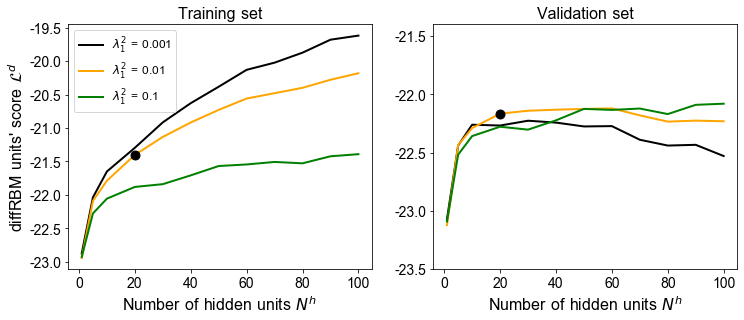

In [36]:
## hyperparametric search (cross-validation) for single-peptide TCR ##

colors = ['k','orange','g','b','red','Maroon','Navy']

nr = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_NLVPMVATV/summary_hypersearch_diffRBM_NLVPMVATV.csv' 
colors = ['k','orange','g','b','red','Maroon','Navy']
hyper = pd.read_csv(nr, sep = ',')

head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))
listl12 = listl120
listhu = list(np.unique(hyper[head[index_hu]].values))
s2=16

w = 2
sc=40
fig, axess = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)

final_hu = 20
final_l12 = 0.01
ax=axess[0]
stri = 'avelik_train'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1[head[index_hu]].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.std(h1[h1[head[index_hu]]==hh][stri].values))
    ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.legend(fontsize=s2-4)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Training set', fontsize = s2)
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.set_ylabel(name_top + u"' score " + form_top, fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
    
ax = axess[1]
stri = 'avelik_test'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1[head[index_hu]].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.mean(h1[h1[head[index_hu]]==hh]['stdlik_test'].values))
    ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Validation set', fontsize = s2)
ax.set_ylim([-23.5,-21.4])
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

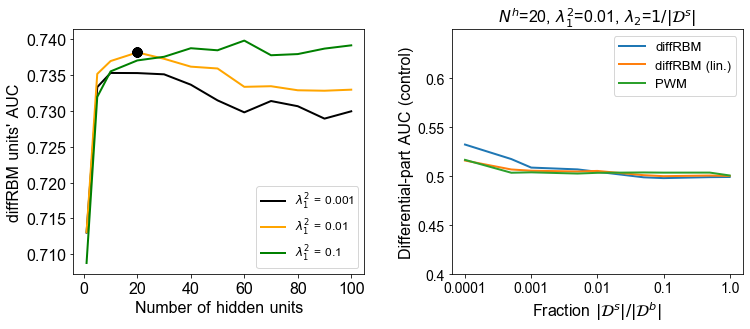

In [37]:
final_hu = 20
final_l12 = 0.01

## TCR model ##
nr = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_NLVPMVATV/summary_hypersearch_diffRBM_NLVPMVATV.csv' 
colors = ['k','orange','g','b','red','Maroon','Navy']
hyper = pd.read_csv(nr, sep = ',')

head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))
listl12 = listl120
listhu = list(np.unique(hyper[head[index_hu]].values))

s2=16
w = 2
sc=40
fig, axess = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

stri = 'topRBM_aveAUC'

ax=axess[0]
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.std(h1[h1[head[index_hu]]==hh][stri].values))
        linex = h1[head[index_hu]].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
            
            ii = list(linex).index(final_hu)
            ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
    
    ax.plot(listhu, temp, c = colors[l], lw=w,  label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]))
    ax.legend(fontsize=s2-4, loc = 'lower right')
    ax.set_xlabel('Number of hidden units', fontsize=s2)
    ax.set_ylabel(name_top + u"' AUC", fontsize=s2)
    ax.tick_params(axis='both', which='major', labelsize = s2)


## hyperparametric search with regularization on gtop only
final_hu = 20
final_l12 = 0.01
hh = final_hu
lib = final_l12
nr = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_NLVPMVATV/final_aucs_sample_size.tsv'

hyper = pd.read_csv(nr, sep = '\t')
head = hyper.columns # see only headers and select the relevant indices

stri='Ratio Mt/Mb'
list_frac = list(np.unique(hyper[stri].values))
error_bar =0
ax=axess[1]
l2f = np.unique(hyper[stri].values)
list_w=[]
list_w_s=[]
list_f_lin=[]
list_f_control=[]
list_f_lin_s=[]
list_f_control_s=[]
for ll in l2f:
    h3 = hyper[hyper[stri]==ll]
    list_w.append(np.mean(h3['top RBM'].values))
    list_w_s.append(np.std(h3['top RBM'].values))
    list_f_lin.append(np.mean(h3['top RBM (lin)'].values))
    list_f_control.append(np.mean(h3['top PWM'].values))
    list_f_lin_s.append(np.std(h3['top RBM (lin)'].values))
    list_f_control_s.append(np.std(h3['top PWM'].values))
if error_bar:
    ax.errorbar(np.log10(list_frac), list_w, yerr = list_w_s, label= 'diffRBM', lw=w)
    ax.errorbar(np.log10(list_frac), list_f_lin, yerr = list_w_s, label= 'diffRBM (lin)', lw=w)
    ax.errorbar(np.log10(list_frac), list_f_control, yerr = list_w_s, label= 'diffPWM', lw=w)
else:
    ax.plot(np.log10(list_frac), list_w, label= 'diffRBM', lw=w)
    ax.plot(np.log10(list_frac), list_f_lin, label= 'diffRBM (lin.)', lw=w)
    ax.plot(np.log10(list_frac), list_f_control, label= 'PWM',lw=w)
ax.set_title(u'$N^h$=' + str(final_hu) + ', $\lambda_{1}^{2}$=' + str(final_l12) + ', $\lambda_{2}$=' + name_reg, fontsize = s2)
ax.set_xlabel(name_fraction, fontsize = s2)
ax.set_ylabel(adjective_top + u'-part AUC (control)', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)
ax.set_ylim([0.4,0.65])
ax.set_yticks([0.40,0.45,0.50,0.55,0.60])
ax.set_yticklabels([0.40,0.45,0.50,0.55,0.60])
ax.legend(fontsize=s2-3)
ax.set_xticks((np.log10(list_frac))[[0,2,4,6,8]])
ax.set_xticklabels(np.array(list_frac)[[0,2,4,6,8]]);

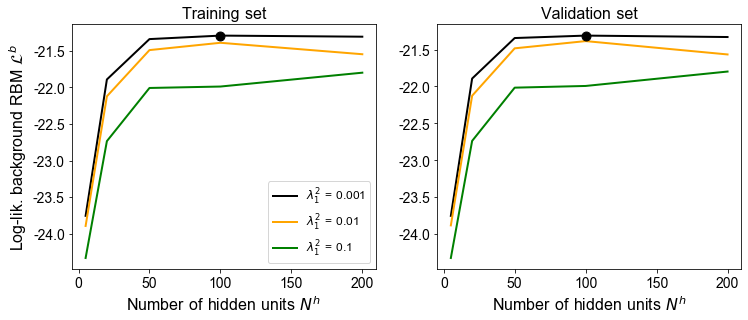

In [38]:
## hyperparametric search (cross-validation) for Pgen ##

colors = ['k','orange','g','b','red','Maroon','Navy']

## TCR model ##

nr = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/summary_hypersearch_backgroundRBM.csv' 
hyper = pd.read_csv(nr, sep = ',')

head = hyper.columns # see only headers and select the relevant indices
index_l12 = 1
index_hu = 0
listl120 = list(np.unique(hyper[head[index_l12]].values))
listl12 = listl120[1:]
listhu = list(np.unique(hyper[head[index_hu]].values))

s2=16
w = 2
sc=40
fig, axess = plt.subplots(1,2)
fig.set_figheight(4.5)
fig.set_figwidth(12)

final_hu = 100
final_l12 = 0.001
ax=axess[0]
stri = 'avelik_train'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1[head[index_hu]].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.std(h1[h1[head[index_hu]]==hh][stri].values))
    ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.legend(fontsize=s2-4)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Training set', fontsize = s2)
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.set_ylabel(u'Log-lik. background RBM $\mathcal{L}^{b}$', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

ax = axess[1]
stri = 'avelik_test'
for l in range(len(listl12)):
    ll = listl12[l]
    temp=[]
    temp2=[]
    temps=[]
    temp2s=[]
    for h in range(len(listhu)):
        hh = listhu[h]
        h1 = hyper[hyper[head[index_l12]] == ll]
        linex = h1[head[index_hu]].values
        liney = (h1[stri].values)
        if ll == final_l12:
            liney_final = np.copy(liney)
        ii = list(linex).index(final_hu)
        temp.append(np.mean(h1[h1[head[index_hu]]==hh][stri].values))
        temps.append(np.std(h1[h1[head[index_hu]]==hh][stri].values))
    ax.plot(listhu, temp, c = colors[l], label = u'$\lambda_{1}^{2}$ = ' + str(listl12[l]), lw = w)
ax.scatter(linex[ii], liney_final[ii], color = 'k', zorder=6, s=2*sc, edgecolor='k')
ax.set_title(u'Validation set', fontsize = s2)
ax.set_xlabel(u'Number of hidden units $N^h$', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)

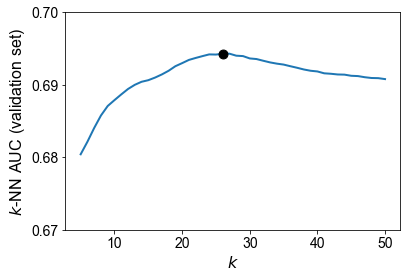

In [39]:
nr = rootf + '/diffRBM_immunogenicity_TCRspecificity/TCR_specificity_model/diffRBM_NLVPMVATV/kNN/hyperpar_summary_kNN.csv' 
hyper = pd.read_csv(nr, sep = ',')

list_k=[]
list_m=[]
list_s=[]
for k in range(5,51):
    hyperk = hyper[hyper['k'] == k]
    lm=[]
    for repl in range(50):
        h2 = hyperk[hyperk['repl_id'] == repl]
        lm.append(float(h2['validation_AUC'].values))
    list_m.append(np.mean(lm))
    list_s.append(np.std(lm))
    list_k.append(k)

s2=16
w = 2
sc=40
fig, ax = plt.subplots()

plt.plot(list_k, list_m, lw = w)
ind = np.argmax(list_m)
plt.scatter(26,list_m[ind], zorder=6, s=2*sc, edgecolor='k', color='k')
ax.set_xlabel(u'$k$', fontsize = s2)
ax.set_yticks([0.67,0.68, 0.69, 0.7])
ax.set_ylabel(u'$k$-NN AUC (validation set)', fontsize = s2)
ax.tick_params(axis='both', which='major', labelsize = s2-2)